In [1]:
import sys, os
sys.path.insert(0, '../')
sys.path.insert(0, '../python_src/')

import numpy as np
import scipy as sp
import pandas as pd
import numpy.random as rand
import scipy.optimize as spo
import cPickle as pickle
import portalocker
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
import shutil, shelve
import tarfile
import time
import itertools as it
import matplotlib.lines as mlines
import matplotlib as mpl

import mech_network_solver as mns
import network
import tuning_algs as talgs
import network_plot as nplot

mpl.rcParams['mathtext.fontset'] = 'cm'
sns.set(color_codes=True)
sns.set_context('talk', font_scale=1.75)
sns.set_palette("hls", 9)
# sns.set_palette("muted", 8)
sns.set_style('ticks', {'xtick.direction': 'in','ytick.direction': 'in', 'axes.linewidth': 2.0})


# def mcError(x, y, dist_param, fit_func, p0, dist="gaussian", bounds=(-np.inf, np.inf), nresample=100, plot=False):
    
#     p = np.zeros([len(p0), nresample], float)
    
#     x = np.array(x, float)
#     y = np.array(y, float)
#     dist_param = np.array(dist_param, float)
        
#     for n in range(nresample):
# #         if n % 100 == 0:
# #             print n
#         if dist=="gaussian":
#             sigma = np.array(dist_param)
#             sigma[sigma <= 0.0] = 1.0
#             y_tmp = np.array(rand.normal(loc=y, scale=sigma))

#             popt, pcov = spo.curve_fit(fit_func, x, y_tmp, p0=p0, sigma=sigma, absolute_sigma=True, maxfev=10000)
#         elif dist=="binomial":
#             y_tmp = np.array(rand.binomial(dist_param.astype(int), y) / dist_param)
#             sigma = np.maximum(wilson_up(y_tmp, dist_param), wilson_low(y_tmp, dist_param))
                
#             popt, pcov = spo.curve_fit(fit_func, x, y_tmp, p0=p0, sigma=sigma,absolute_sigma=False,
#                                   bounds=bounds, max_nfev = 10000)
        
#         p[:, n] = popt
    
#     if plot:
    
#         fig, axes = plt.subplots(1, len(p0), figsize=(24, 8))
#         for i in range(len(p0)):
#             sns.distplot(p[i], ax=axes[i], rug=True, rug_kws={"color": "g"},
#                          kde_kws={"color": "k", "lw": 3},
#                          hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "g"})
    
#     return np.mean(p, axis=1), np.std(p, axis=1), sp.stats.skew(p, axis=1)



Loading Mechanical Network Deformation Solver Module


In [2]:
t0 = time.time()

# directory = "/data1/home/rocks/data/sat_transition/tune_cont_global_1D/"
# directory = "/data1/home/rocks/data/sat_transition/tune_cont_local_1D/"
# tr_solver = exact, tol = sqrt(eps)
# directory = "/data1/home/rocks/data/sat_transition/tune_cont_local_2D_exact/"
# tr_solver = lsmr, tol = sqrt(eps)
# directory = "/data1/home/rocks/data/sat_transition/tune_cont_local_2D_lsmr/"
# tr_solver = lsrm, tol = sqrt(eps) / 100
# directory = "/data1/home/rocks/data/sat_transition/tune_cont_local_2D_lsmr_2/"
# tr_solver = lsrm, tol = eps
# directory = "/data1/home/rocks/data/sat_transition/tune_cont_local_2D_lsmr_3/"
# lbfgsb solver
# directory = "/data1/home/rocks/data/sat_transition/tune_cont_local_2D_lbfgsb/"
# tnc solver
# directory = "/data1/home/rocks/data/sat_transition/tune_cont_local_2D_tnc/"
# slsqp solver
# directory = "/data1/home/rocks/data/sat_transition/tune_cont_local_2D_slsqp/"

# directory = "/data1/home/rocks/data/sat_transition/test/"

# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_slice/"
# directory = "/data1/home/rocks/data/sat_transition/tune_cont_local_2D_surface/"
# directory = "/data1/home/rocks/data/sat_transition/tune_cont_global_2D/"

# errors when solving final system, so some failures excluded
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_prelim/"
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D/"
#raised zero mode cutoff to 1e-6
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_2/"
# bordered Hessian
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_3/"
# bordered Hessian with 1e-2 tether
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_4/"
# bordered Hessian with 1e-1 tether
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_5/"
# bordered Hessian with 1e-3 tether
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_6/"
# bordered Hessian with 1e-4 tether
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_7/"
# bordered Hessian with 1e-6 tether
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_8/"
# bordered Hessian with 1e-6 tether and reset when error becomes too large
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_9/"
# bordered Hessian with 0.0 tether, avoiding edges that create too much error
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_10/"
# bordered Hessian with condition number bound of 1e9
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_11/"
# bordered Hessian with SM tol of 1e-3
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_12/"
# bordered Hessian with SM tol of 1e-3 and error tolerance of 1e-10
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_13/"
# bordered Hessian with SM tol of 1e-2 and error tolerance of 1e-10
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_14/"
# bordered Hessian with SM tol of 1e-3 and error tolerance of 1e-10 and grid space sites
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_15/"
# bordered Hessian with SM tol of sqrt(eps) and grid space sites
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_16/"
# bordered Hessian with SM tol of 1e-4, reset tol of 1e-4, rel obj tol 1e-8 and grid space sites
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_17/"
# bordered Hessian with SM tol of 1e-4, reset tol of 1e-8, rel obj tol 1e-8 and grid space sites
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_18/"
# bordered Hessian with SM tol of 1e-3, reset tol of 1e-8, rel obj tol 1e-8 and grid space sites
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_19/"
# rel response with random edges
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_20/"
# rel response with spaced edges
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_21/"
# rel response with random edges and Lp=-2.0
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_22/"
# abs response with random edges and Lp=-2.0
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_23/"
# abs response with random edges and Lp=-2.0 and cutoff of 1e-2
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_24/"
# rel response with random edges and cutoff of 1e-4 w/o resets
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_25/"



# global compression with random edges
# directory = "/data1/home/rocks/data/sat_transition/tune_disc_global_2D_1/"



directory = "/data1/home/rocks/data/sat_transition/tune_disc_local_2D_cutoff_0/"



# os.remove(directory+"tune_lin_db.bin.dat")

files = []

print "Listing files..."

for f in os.listdir(directory):
    if f.endswith(".pkl") and f != "file_list.pkl" and  f != "tune_analysis.pkl":
        files.append(f)
        
if len(files) > 0:
        
    print "Loading..."

    db = shelve.open(directory+"tune_db.bin")    

    print "Size of existing database:", len(db)

    print "Files to add:", len(files)
    
    del_list = []

    for i, fn in enumerate(files):  
        if i % 1000 == 0:
            print i

        if fn not in db:
            try:
                with open(directory + fn, 'rb') as pkl_file:
                    data = pickle.load(pkl_file)
                    db[fn] = data

                del_list.append(fn)

            except (IOError, EOFError):
                print "Error loading", fn
                continue

    #     shutil.move(directory + fn, directory + "data/" + fn)    

    print "Final size of database:", len(db)

    file_list = set(db.keys())

    db.close()


    print "Backing up..."

    with tarfile.open(directory+"sim_files.tar", 'a') as tar:

        print "Appending to tar..."
        for fn in files:
            tar.add(directory+fn)
            os.remove(directory+fn)


    print "Updating file list..."

    with open(directory+"file_list.pkl", 'wb+') as pkl_file:
        portalocker.lock(pkl_file, portalocker.LOCK_EX)

        data = dict({'files' : set(file_list)})

        pickle.dump(data, pkl_file)

        pkl_file.close()

print "Complete"

t1 = time.time()
print "Total Time", t1-t0

Listing files...
Loading...
Size of existing database: 183921
Files to add: 175081
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
1

In [3]:
t0 = time.time()

# os.remove(directory+"tune_analysis.pkl")

db = shelve.open(directory+"tune_db.bin", flag='r')    

files = set(db.keys())

try:
    with open(directory+"tune_analysis.pkl", 'rb') as pkl_file:
        data = pickle.load(pkl_file)
        df = data['df']
        fn_set = data['fn_set']
        
        print "Size of existing analysis:", len(df.index)
except (IOError, EOFError):
    print "No data. Initializig dataframe..."
    df = pd.DataFrame(columns=['fn', 'NN', 'NTS', 'NE', 'eta', 'Lp', 'Rc', 'NDISC', 'feas_stat', 'feas_func', 'max_error',
                               'DZ', 'irec', 'obj_func', 'tol', 'niter', 'low_bound',  'min_eval', 'condition',
                               'success_flag', 'result_msg', 'NR', 'obj_error'], dtype=float)
    
    fn_set = set()
    
     
files -= fn_set
 
print "Adding", len(files)
    
s_list = []
for i, fn in enumerate(files):
    if i % 1000 == 0:
        print i
        
    fn_set.add(fn)
    
    data = db[fn]
        
    success_flag = data['success_flag']
    result_msg = data['result_msg']

    NE = data['NE']
    DZ = data['DZ']
    NN = data['NN_init']
    irec = data['irec']
    NDISC = data['NDISC']
    NTS = data['NTS']
    eta = data['eta']
    Rc = np.around(data['Rc'] * np.sqrt(2)**(np.log2(NN) - np.log2(8)), decimals=2)
        
    Lp = data['Lp']
#     Lp = -1.0
    tol = 0
    obj_func = data['obj_func']
#     NR = data['NR']
    NR = 0
    niter = 0
#     low_bound = data['low_bound']
    low_bound= 0
#     feasible_status = data['feasible_status']
#     feasible_func = data['feasible_func']
    
    feasible_status = None
    feasible_func = None
    
    max_error = data['max_error']
    min_eval = data['min_eval']
    condition = data['condition']
    obj_error = data['obj_err']
    
    
    
#     max_error = 0.0
#     min_eval = 0.0
#     condition = 0.0
#     obj_error = 0.0

#     error = None
#     min_eval = None
        
    s_list.append(pd.Series({'fn': fn,
                   'NN':NN, 'NTS':NTS, 'irec':irec, 'NDISC': NDISC, 'Rc': Rc,
                             'feas_stat': feasible_status, 'feas_func':feasible_func,
                   'NE': NE, 'DZ': DZ, 'eta': eta, 'Lp': Lp, 'tol': tol, 'niter': niter,'low_bound': low_bound,
                   'success_flag':success_flag, 'result_msg': result_msg, 'max_error': max_error, 'min_eval': min_eval,
                   'obj_func': obj_func, 'NR': NR, 
                            'condition': condition, 'obj_error':obj_error}))
     
        
df_add = pd.DataFrame(s_list, columns=['fn', 'NN', 'NTS', 'NE', 'eta', 'Lp', 'Rc', 'NDISC','feas_stat', 'feas_func',
                               'DZ', 'irec', 'obj_func', 'tol', 'niter','low_bound', 'max_error','min_eval',
                               'success_flag', 'result_msg', 'NR', 'condition', 'obj_error'])
    
    
print df_add.groupby(['Lp', 'Rc', 'eta', 'NN', 'NTS']).size()

    
df = pd.concat([df, df_add])
    
db.close()
    
print "Saving..."        

with open(directory+"tune_analysis.pkl", 'wb') as output:
    pickler = pickle.Pickler(output, -1)
    data = {'df': df, 'fn_set': fn_set}
    pickler.dump(data)

print "Final size of analysis:", len(df.index)


t1 = time.time()
print "Total Time", t1-t0

Size of existing analysis: 183921
Adding 175081
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
1

In [45]:
shutil.copyfile(directory+"tune_db.bin.dat", directory+"tune_lin_db.bin.dat_backup")
shutil.copyfile(directory+"sim_files.tar", directory+"sim_files.tar_backup")

In [4]:
pd.options.display.max_rows = 9999

# df = df[df.success_flag != '`ftol` termination condition is satisfied.']

# df = df[df.error < 1e8]

def wilson_up(p, n):
    z = 1.0
    return 1.0 / (1.0 + z**2/n) * (p + 0.5*z**2 / n + z*np.sqrt(1.0/n * p * (1.0 - p) + 0.25*z**2/n**2)) - p

def wilson_low(p, n):
    z = 1.0
    return p - 1.0 / (1.0 + z**2/n) * (p + 0.5*z**2 / n - z*np.sqrt(1.0/n * p * (1.0 - p) + 0.25*z**2/n**2))


# tol = np.finfo(float).eps
tol = 1e-10

print df.groupby(['NN', 'Lp', 'eta', 'Rc']).size()
print df.groupby(['result_msg']).size()
print df.groupby(['success_flag']).size()

print df[(df.eta==0.1) & (df.obj_func >=0) & (df.success_flag!=2.0) & (df.max_error > 1e-8)].groupby(['Lp', 'eta', 'NN', 'NTS', 'irec', 'max_error', 'success_flag']).size()

# print df[(df.obj_func > tol) & (df.success_flag!=2.0) & (df.error > 1e-5)].groupby(['eta', 'NN', 'NTS', 'obj_func']).size()


# print df[(df.NN==128) & (df.NTS==10)].groupby(['irec', 'success_flag']).size()

# print df.groupby(['feas_func']).size()
# print df[df.feas_func < 1e-12].groupby(['eta', 'NN', 'NTS', 'feas_stat']).size()
# print df[df.feas_func > 1e-12].groupby(['eta', 'NN', 'NTS', 'feas_stat']).size()

# print df[(df.obj_func < tol) & (df.success_flag!=2.0) & (df.min_eval < 2e-2)].groupby(['eta', 'NN', 'NTS']).size()


print df.groupby(['Lp', 'Rc', 'eta', 'NN', 'NTS'])['success_flag'].size()
print df[(df.obj_func < tol)].groupby(['Lp', 'Rc', 'eta', 'NN', 'NTS'])['success_flag'].size()


# print df[df.success_flag==0.0].groupby(['eta', 'NN', 'NTS'])['success_flag'].size()


# df['rhoR'] = df['NR'] / df['NE']

df_agg = df.groupby(['Lp', 'Rc', 'NN', 'NTS', 'eta']).agg({'DZ': np.mean, 'NE': np.mean})

df_agg['count'] = df[df.success_flag!=2.0].groupby(['Lp', 'Rc', 'NN', 'NTS', 'eta']).size()

df_agg['err_count'] = df[df.success_flag==2.0].groupby(['Lp', 'Rc', 'NN', 'NTS', 'eta']).size()

df_agg['fsat'] = df[(df.obj_func < tol) & (df.success_flag!=2.0)].groupby(['Lp', 'Rc', 'NN', 'NTS', 'eta']).size() / df_agg['count']

df_agg['niter'] = df[df.success_flag!=2.0].groupby(['Lp', 'Rc', 'NN', 'NTS', 'eta']).aggregate(np.mean)['niter']
# df_agg['NE'] = df[df.success_flag != 0.0].groupby(['NN', 'NTS', 'eta']).aggregate(np.mean)['NE']
df_agg['NR'] = df[df.success_flag==0.0].groupby(['Lp', 'Rc', 'NN', 'NTS', 'eta']).aggregate(np.mean)['NR']


df_agg = df_agg.fillna(0.0)

# df_agg['NR'] = df[df.success_flag==0.0].groupby(['eta']).agg({'NR': np.mean})
# df_agg['NR_err'] = df[df.success_flag==0.0].groupby(['eta']).agg({'NR': np.std})
# df_agg['NR_err'] /= df[df.success_flag==0.0].groupby(['eta']).size()
# df_agg['rhoR'] = df[df.success_flag==0.0].groupby(['eta']).agg({'rhoR': np.mean})
# df_agg['rhoR_err'] = df[df.success_flag==0.0].groupby(['eta']).agg({'rhoR': np.std}) 
# df_agg['rhoR_err'] /= df[df.success_flag==0.0].groupby(['eta']).size()

df_agg = df_agg.reset_index()

df_agg['fsat_err_up'] = wilson_up(df_agg['fsat'], df_agg['count'])
df_agg['fsat_err_low'] = wilson_low(df_agg['fsat'], df_agg['count'])

df_agg['fsat_err_width'] = df_agg['fsat_err_up'] + df_agg['fsat_err_low']

df_agg = df_agg.fillna(0.0)

# print df[df.success_flag!=2.0].groupby(['eta', 'NN', 'NTS']).size()

# print df_agg


# print df_agg

# print df_agg[df_agg['count'] > 64].groupby('NN').size()


# print df[df.success_flag==0.0].groupby(['NN', 'NTS', 'eta']).size()

# df_agg['cost_func_norm'] = df_agg['cost_func'] / df_agg['NTS']

# df_agg['cost_func_norm_err'] = df.groupby(['NN', 'NTS', 'eta']).std().reset_index()['cost_func'] / np.sqrt(df_agg['count']) / df_agg['NTS']

NN      Lp    eta  Rc  
8.0     -1.0  0.1  0.50    3845
              1.0  0.50    3774
16.0    -1.0  0.1  0.50    3810
                   0.71    8111
              1.0  0.50    3821
                   0.71    8107
32.0    -1.0  0.1  0.50    3884
                   0.71    8112
                   1.00    8192
              1.0  0.50    3854
                   0.71    8101
                   1.00    8192
64.0    -1.0  0.1  0.50    3874
                   0.71    8134
                   1.00    8192
                   1.41    8192
              1.0  0.50    3863
                   0.71    8132
                   1.00    8191
                   1.41    8192
128.0   -1.0  0.1  0.50    3885
                   0.71    8146
                   1.00    8192
                   1.41    8192
                   2.00    8192
              1.0  0.50    3902
                   0.71    8139
                   1.00    8191
                   1.41    8191
                   2.00    8191
256.0   -1.0  0.

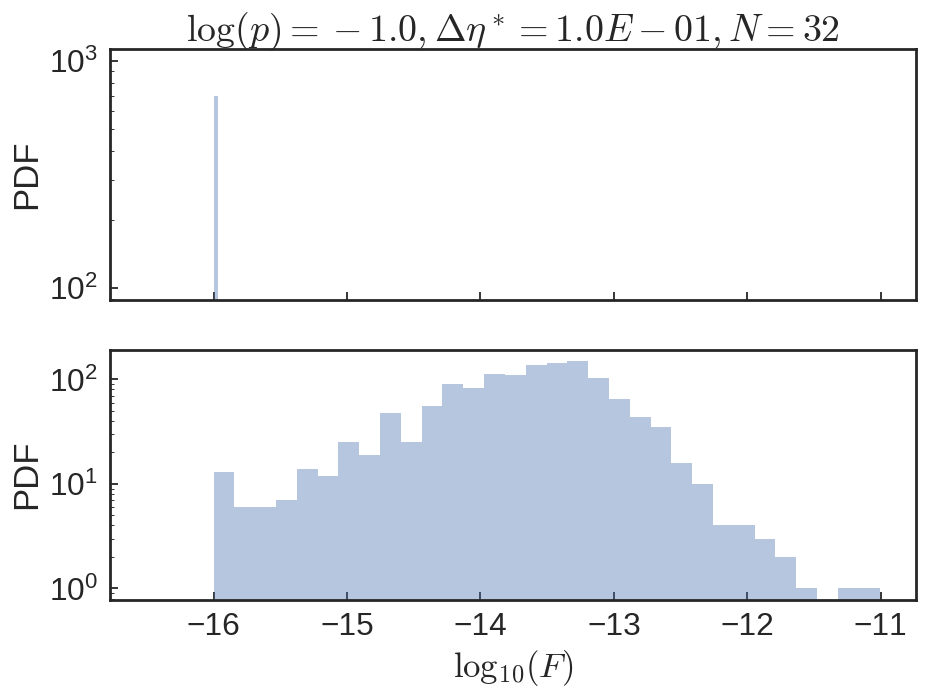

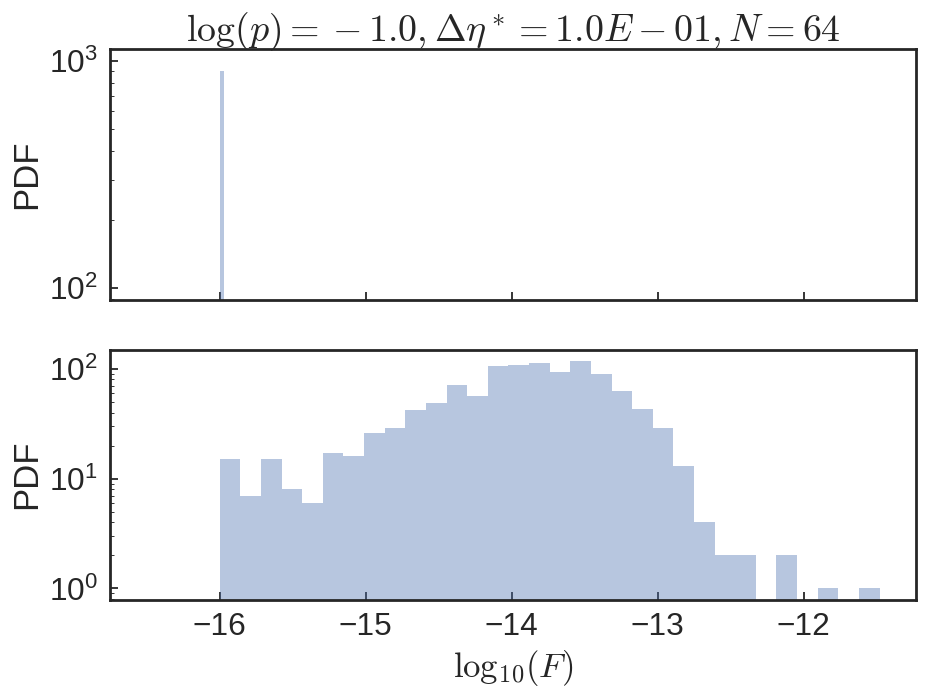

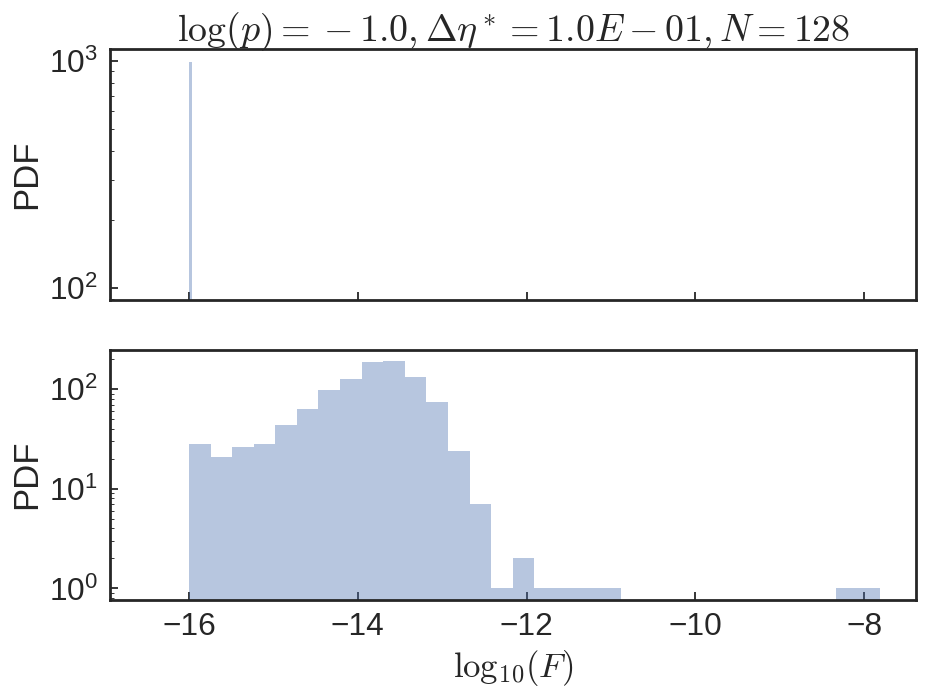

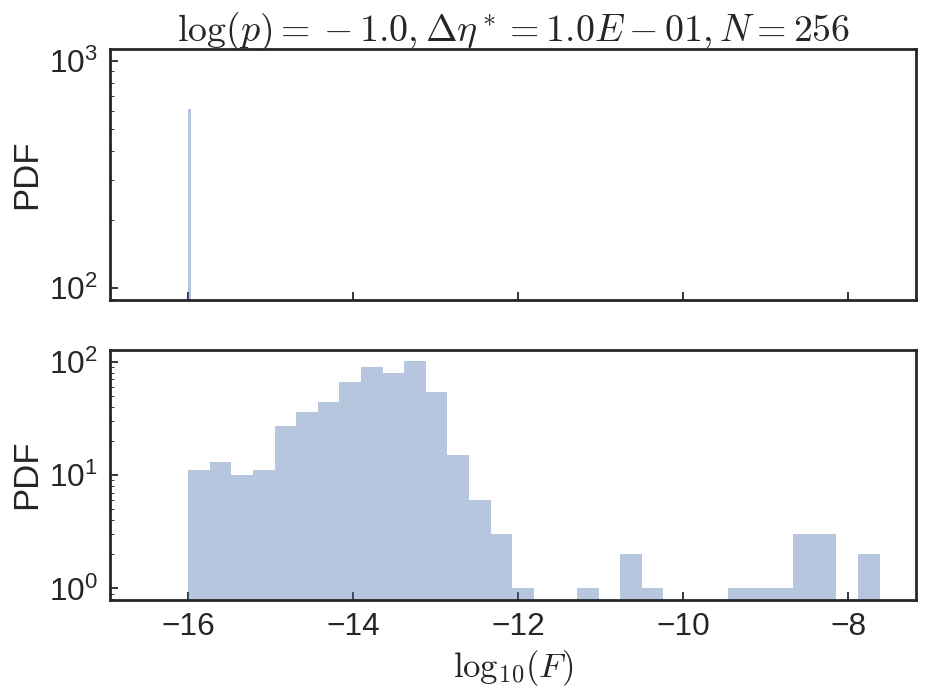

In [32]:
for (NN, Lp, eta, Rc), group in df[df.success_flag!=2.0].groupby(['NN', 'Lp', 'eta', 'Rc']):

#     if NN < 512:
#         continue
    
#     for NTS, group in group1.groupby('NTS'):
#         print NTS
            
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
                
    sns.distplot(np.log10(np.abs(group[group.obj_func < tol]['obj_error'])+1e-16), kde=False, ax=ax1, bins = 32, norm_hist=False, color='b')
#     ax1.vlines(np.log10(np.finfo(float).eps), 1e-4, 3e0)
#     ax1.vlines(np.log10(tol), 1e-4, 3e0, color='b')
    ax1.set_yscale('log')
    # ax1.set_xscale('symlog', linthreshx=1e-10)
#     ax1.set_xlim(-3, 0)
#     ax1.set_ylim(1e-4, 3e0)
    ax1.set_xlabel("")
    ax1.set_ylabel("PDF")
    ax1.set_title(r'$\log(p)={0:.1f}, \Delta\eta^*={1:.1E}, N={2:d}$'.format(Lp, eta, int(NN)))
    
    sns.distplot(np.log10(np.abs(group[group.obj_func > tol]['obj_error'])+1e-16), kde=False, ax=ax2, bins = 32, norm_hist=False, color='b')
#     ax2.vlines(np.log10(np.finfo(float).eps), 1e-1, 1e0)
#     ax2.vlines(np.log10(tol), 1e-1, 1e0, color='b')
    ax2.set_yscale('log')
    # ax2.set_xscale('symlog', linthreshx=1e-10)
    # ax2.set_xlim(-1, 1)
#     ax1.set_xlim(-4, 0)
#     ax2.set_ylim(1e-1, 1e0)
    ax2.set_xlabel(r"$\log_{10} (F)$")
    ax2.set_ylabel("PDF")
    plt.show()

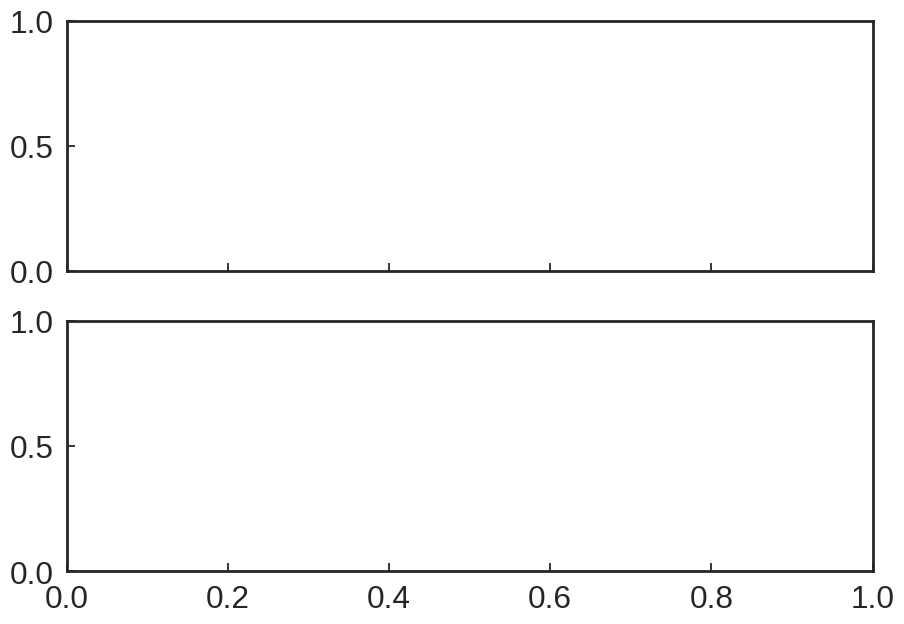

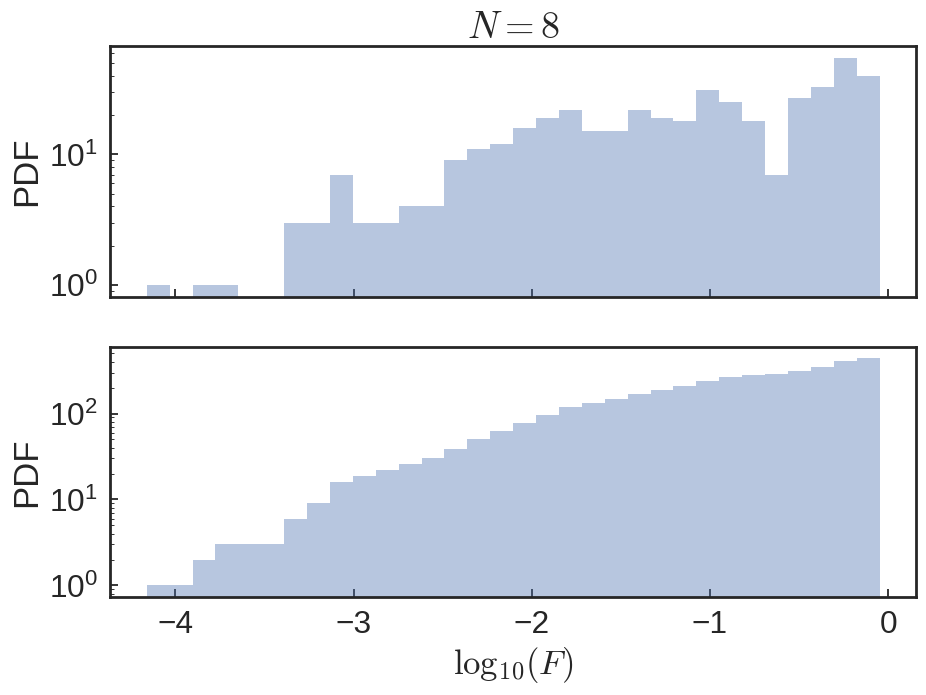

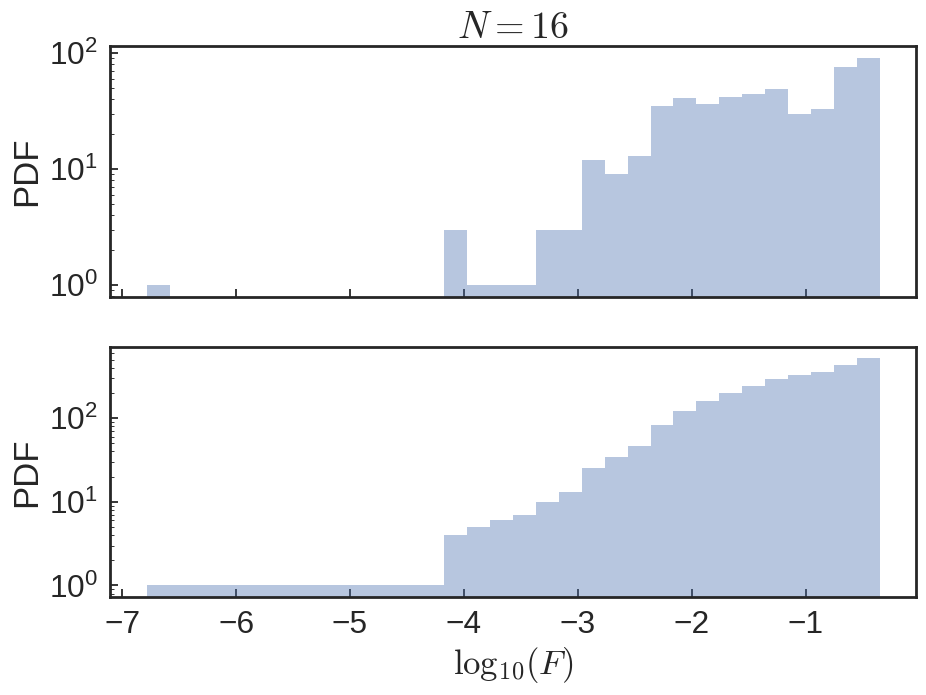

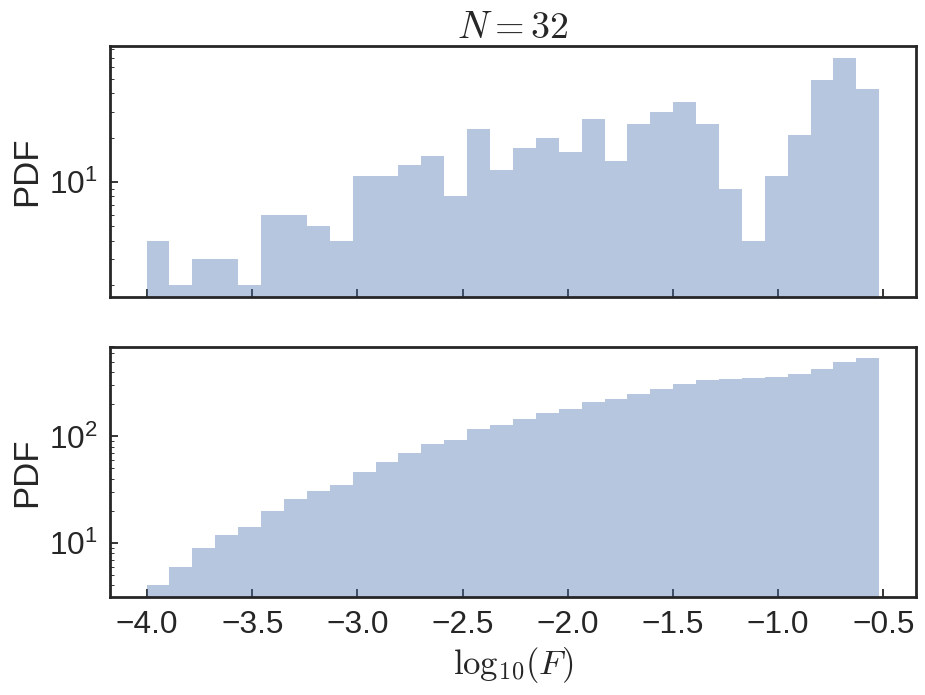

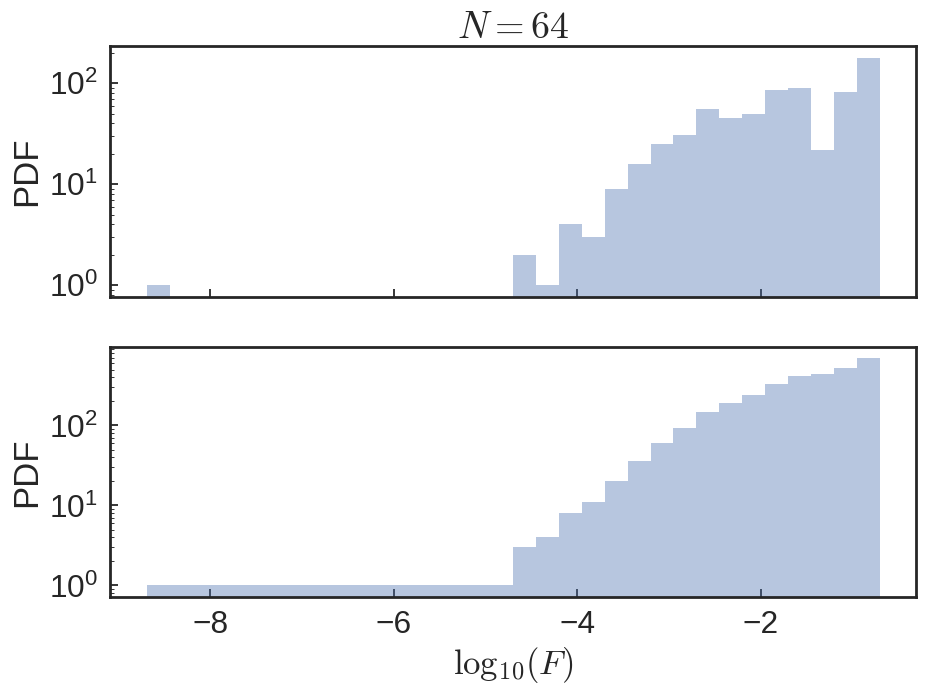

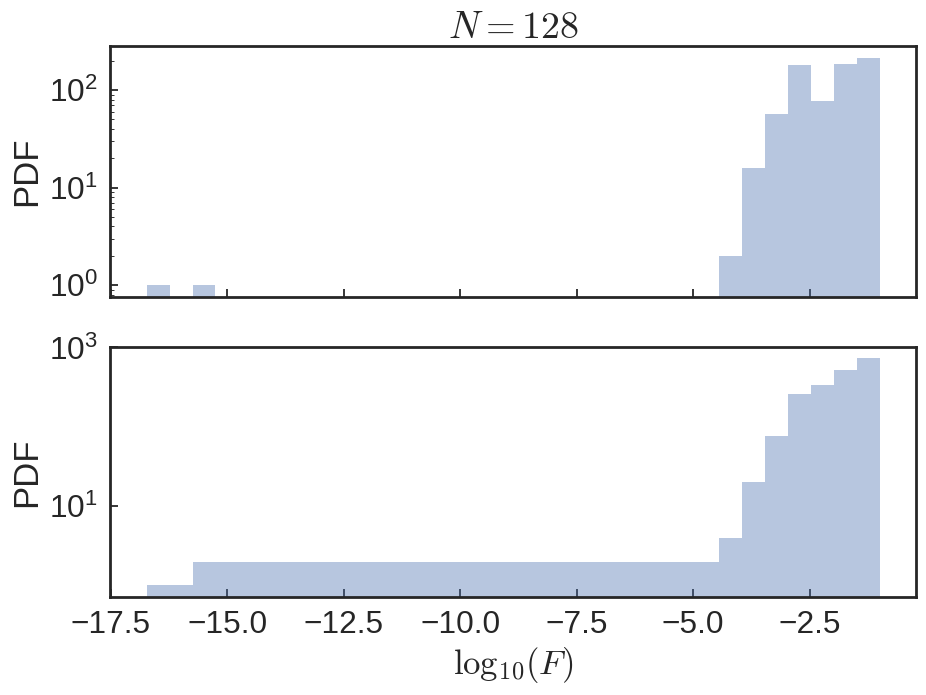

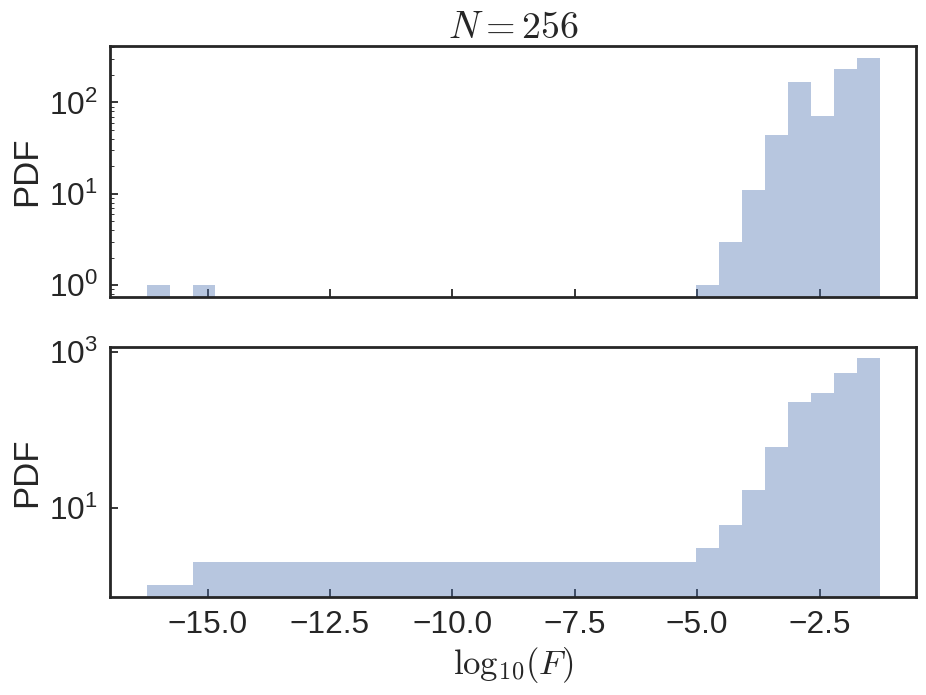

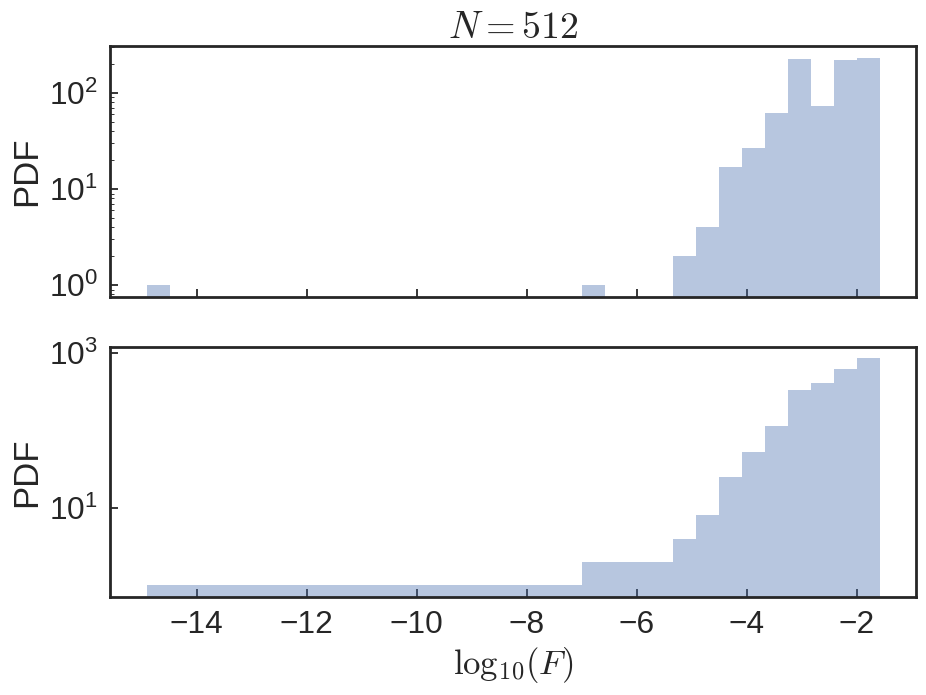

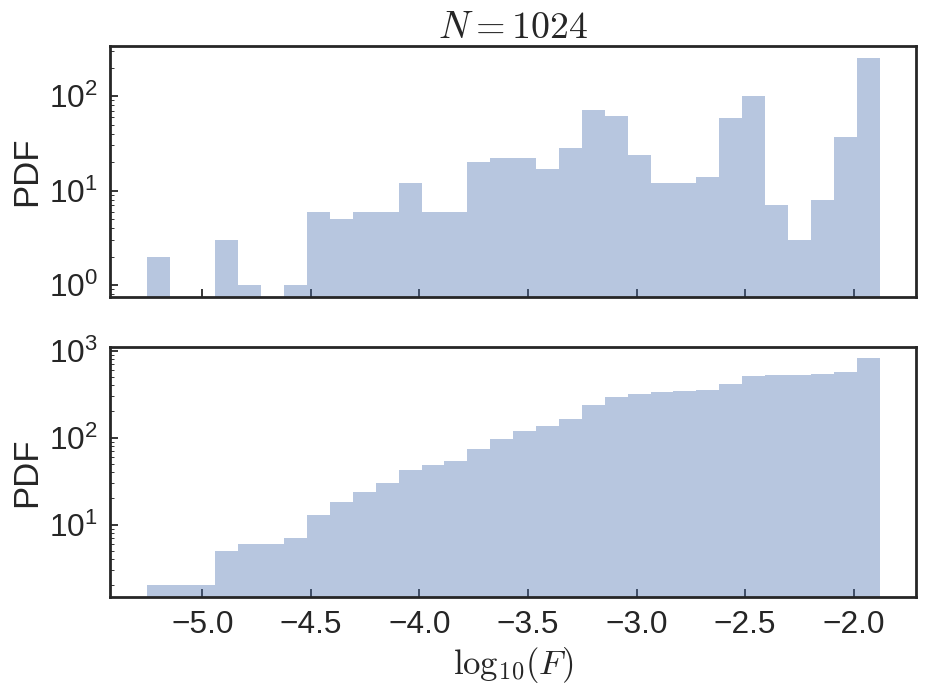

In [140]:
for NN, group in df[df.success_flag!=2.0].groupby('NN'):

#     for NTS, group in group1.groupby('NTS'):
#         print NTS
    
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    
    sns.distplot(np.log10(np.abs(group[group.obj_func < tol]['min_eval'])), kde=False, ax=ax1, bins = 32, norm_hist=False, color='b')
#     ax1.vlines(np.log10(np.finfo(float).eps), 1e-4, 3e0)
#     ax1.vlines(np.log10(tol), 1e-4, 3e0, color='b')
    ax1.set_yscale('log')
    # ax1.set_xscale('symlog', linthreshx=1e-10)
#     ax1.set_xlim(-3, 0)
#     ax1.set_ylim(1e-4, 3e0)
    ax1.set_xlabel("")
    ax1.set_ylabel("PDF")
    ax1.set_title("$N={0:d}$".format(int(NN)))

    sns.distplot(np.log10(np.abs(group[group.obj_func < tol]['min_eval'])), kde=False, ax=ax2, bins = 32, norm_hist=False, 
                 hist_kws={'cumulative': True}, color='b')
#     ax2.vlines(np.log10(np.finfo(float).eps), 1e-1, 1e0)
#     ax2.vlines(np.log10(tol), 1e-1, 1e0, color='b')
    ax2.set_yscale('log')
    # ax2.set_xscale('symlog', linthreshx=1e-10)
    # ax2.set_xlim(-1, 1)
#     ax1.set_xlim(-4, 0)
#     ax2.set_ylim(1e-1, 1e0)
    ax2.set_xlabel(r"$\log_{10} (F)$")
    ax2.set_ylabel("PDF")
    plt.show()

0


/data1/home/rocks/anaconda/envs/default/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log10
/data1/home/rocks/anaconda/envs/default/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log10


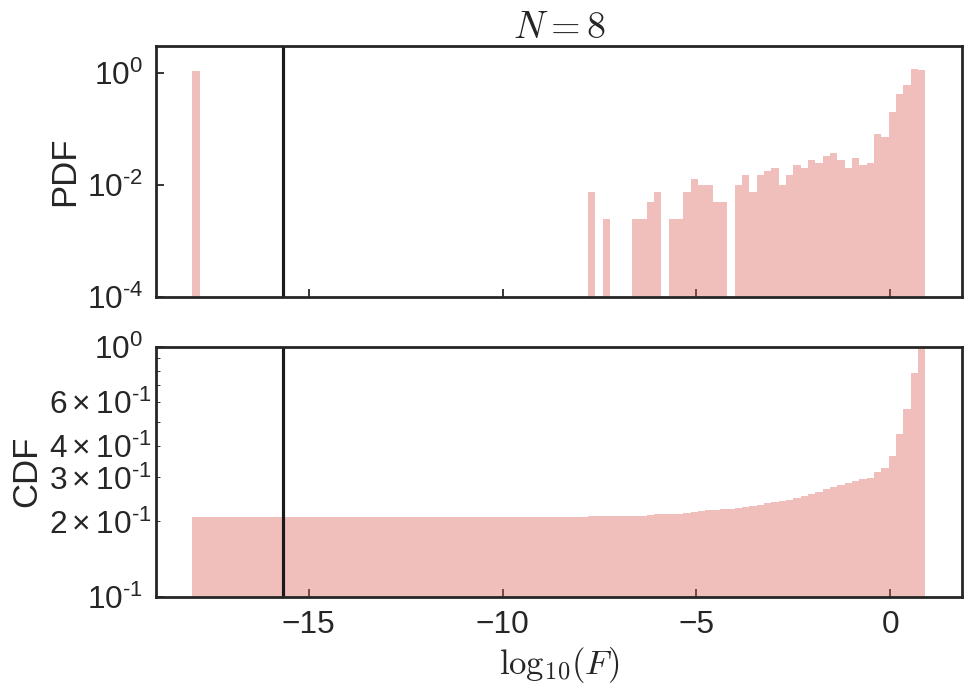

0


KeyboardInterrupt: 

In [121]:
for NN, group in df[df.success_flag!=2.0].groupby('NN'):

#     for NTS, group in group1.groupby('NTS'):
#         print NTS
    
    print tol
    
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    sns.distplot(np.log10(group['obj_func']+1e-18), kde=False, ax=ax1, bins = 100, norm_hist=True)
    ax1.vlines(np.log10(np.finfo(float).eps), 1e-4, 3e0)
    ax1.vlines(np.log10(tol), 1e-4, 3e0, color='b')
    ax1.set_yscale('log')
    # ax1.set_xscale('symlog', linthreshx=1e-10)
    # ax1.set_xlim(-1, 1)
    ax1.set_ylim(1e-4, 3e0)
    ax1.set_xlabel("")
    ax1.set_ylabel("PDF")
    ax1.set_title("$N={0:d}$".format(int(NN)))

    sns.distplot(np.log10(group['obj_func']+1e-18), kde=False, ax=ax2, bins = 100, hist_kws={'cumulative': True},
                norm_hist=True)
    ax2.vlines(np.log10(np.finfo(float).eps), 1e-1, 1e0)
    ax2.vlines(np.log10(tol), 1e-1, 1e0, color='b')
    ax2.set_yscale('log')
    # ax2.set_xscale('symlog', linthreshx=1e-10)
    # ax2.set_xlim(-1, 1)
    ax2.set_ylim(1e-1, 1e0)
    ax2.set_xlabel(r"$\log_{10} (F)$")
    ax2.set_ylabel("CDF")
    plt.show()

8.0
[ 5.85303086  2.36692492]
[ 0.07310275  0.06941093]
1.0 11.0
16.0
[ 7.03337466  2.84562935]
[ 0.07636784  0.07197424]
1.0 13.0
32.0
[ 8.3696525  3.4698948]
[ 0.08310896  0.08542046]
1.0 15.0
64.0
[ 8.85976921  3.65512183]
[ 0.09420513  0.10451039]
2.0 16.0
128.0
[ 8.93284135  3.58594274]
[ 0.08811399  0.09561947]
2.0 16.0
256.0
[ 8.97493154  3.36707188]
[ 0.07969939  0.08768103]
2.0 16.0
512.0
[ 8.88234624  3.58301031]
[ 0.09486878  0.09049854]
2.0 16.0
1024.0
[ 8.86384371  3.43393475]
[ 0.09502414  0.08784371]
2.0 16.0


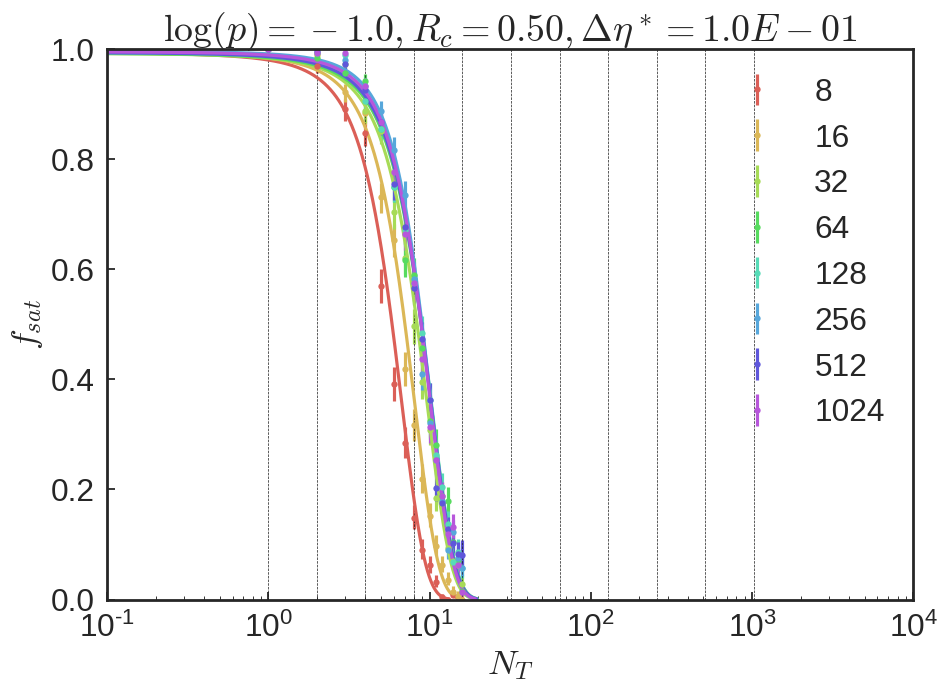

8.0
[ 0.82013737  2.22431429]
[ 0.14893509  0.16765536]
-4.0 5.0
16.0
[ 0.77181602  2.00256755]
[ 0.13819707  0.15971748]
-3.0 5.0
32.0
[ 0.8206742   2.26127481]
[ 0.16787118  0.18366459]
-4.0 5.0
64.0
[ 0.10273034  2.69954321]
[ 0.24629996  0.23982006]
-5.0 6.0
128.0
[ 0.54127141  2.37292219]
[ 0.15791943  0.18228866]
-4.0 5.0
256.0
[ 0.17129662  2.76613927]
[ 0.27279456  0.28743088]
-5.0 6.0


/data1/home/rocks/anaconda/envs/default/lib/python2.7/site-packages/scipy/optimize/optimize.py:964: RuntimeWarning: divide by zero encountered in double_scalars
  rhok = 1.0 / (numpy.dot(yk, sk))


512.0
[ 0.02481461  3.17350988]
[ 0.3508675   0.36707872]
-6.0 6.0


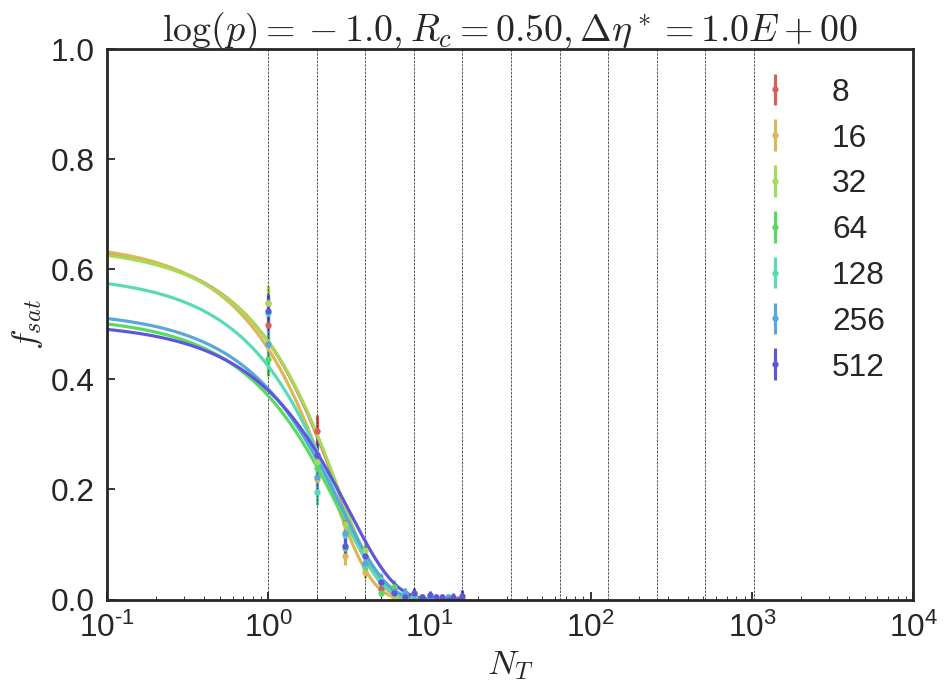

16.0
[ 7.9221145   2.91638884]
[ 0.07595235  0.08557548]
2.0 14.0
32.0
[ 10.29597773   3.69127338]
[ 0.09088318  0.1013228 ]
3.0 18.0
64.0
[ 11.70466799   4.24967313]
[ 0.09674413  0.08523963]
3.0 20.0
128.0
[ 12.14739663   4.58687852]
[ 0.08706525  0.09389765]
3.0 21.0
256.0
[ 12.12259041   4.7887639 ]
[ 0.10633352  0.09170084]
3.0 22.0
512.0
[ 12.0855565    4.61031688]
[ 0.09280995  0.11660959]
3.0 21.0
1024.0
[ 12.48972414   4.321262  ]
[ 0.27917311  0.22920579]
4.0 21.0


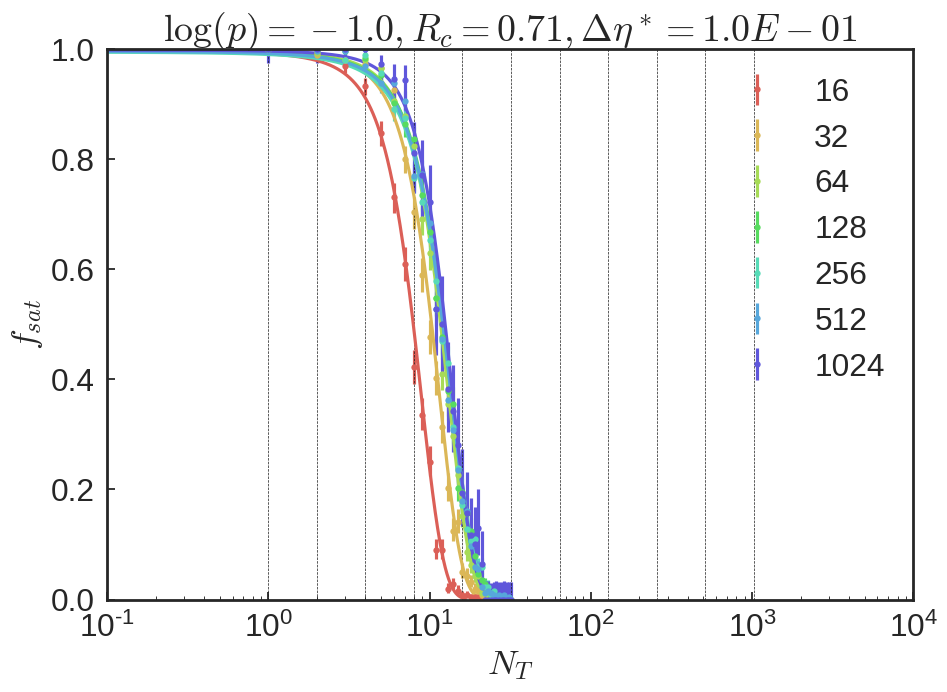

16.0
[ 0.85097213  2.24070247]
[ 0.15587635  0.18176653]
-4.0 5.0
32.0
[ 0.76307533  2.15290272]
[ 0.1526487   0.13864058]
-4.0 5.0
64.0
[-0.2229086   3.48402755]
[ 0.30956343  0.28011848]
-7.0 7.0
128.0
[ 0.04190581  2.98725384]
[ 0.28176356  0.27537252]
-6.0 6.0
256.0
[-2.19569861  5.22435832]
[ 0.84434753  0.723706  ]
-13.0 8.0
512.0
[-0.99627636  4.32386173]
[ 0.84261122  0.82265542]
-10.0 8.0


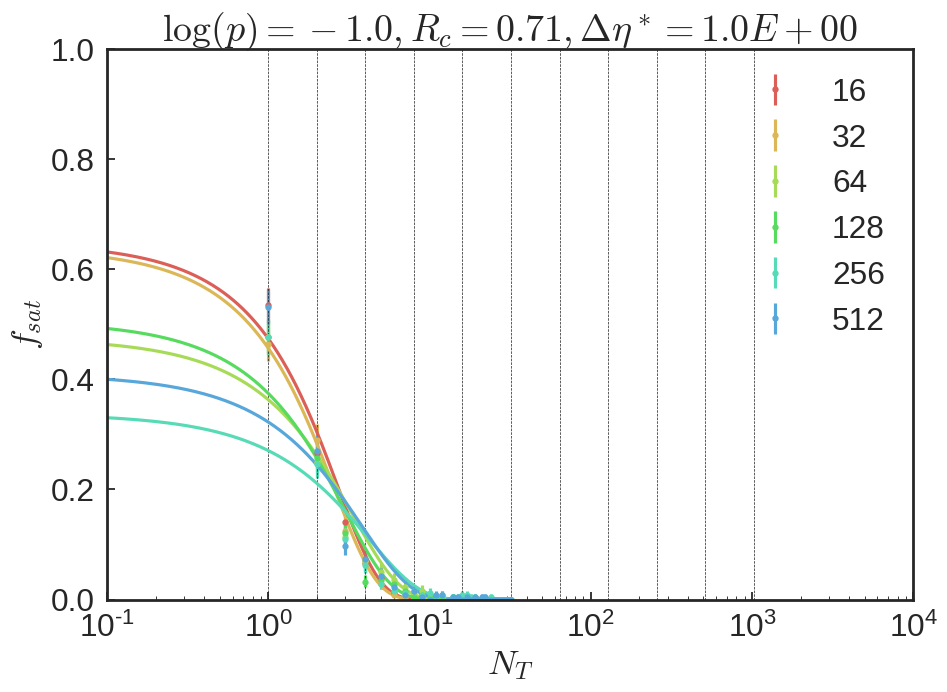

32.0
[ 11.57561619   3.60643438]
[ 0.09484466  0.08183821]
4.0 19.0
64.0
[ 14.72107914   4.81590725]
[ 0.10801178  0.1066703 ]
5.0 24.0
128.0
[ 15.85636445   5.51534253]
[ 0.10608665  0.09415756]
5.0 27.0
256.0
[ 15.87840569   5.56775348]
[ 0.11494011  0.09835599]
5.0 27.0
512.0
[ 15.77389832   5.30280439]
[ 0.09731463  0.10522679]
5.0 26.0
1024.0
[ 15.52339741   5.32868236]
[ 0.11092149  0.10926329]
5.0 26.0


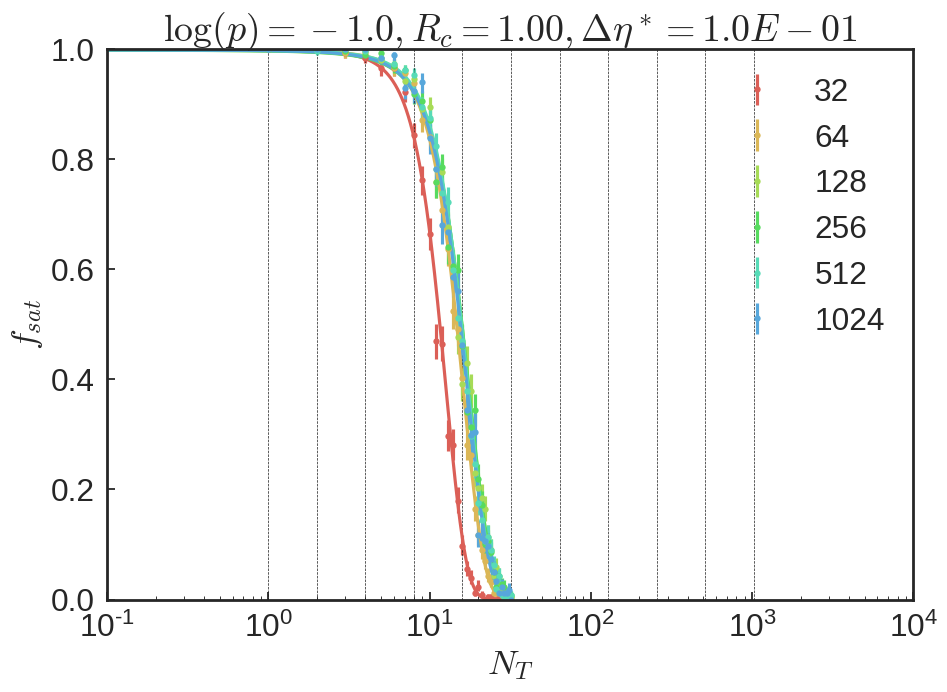

32.0
[ 0.73512791  2.35617098]
[ 0.13992362  0.13770449]
-4.0 5.0
64.0
[ 0.04058334  3.24536594]
[ 0.43902359  0.46362794]
-6.0 7.0
128.0
[-1.75217564  5.24559817]
[ 0.71153429  0.61630851]
-12.0 9.0
256.0
[-1.62911461  4.80913165]
[ 0.59615529  0.55622523]
-11.0 8.0
512.0
[-2.14938728  5.43933265]
[ 0.58881761  0.5254528 ]
-13.0 9.0


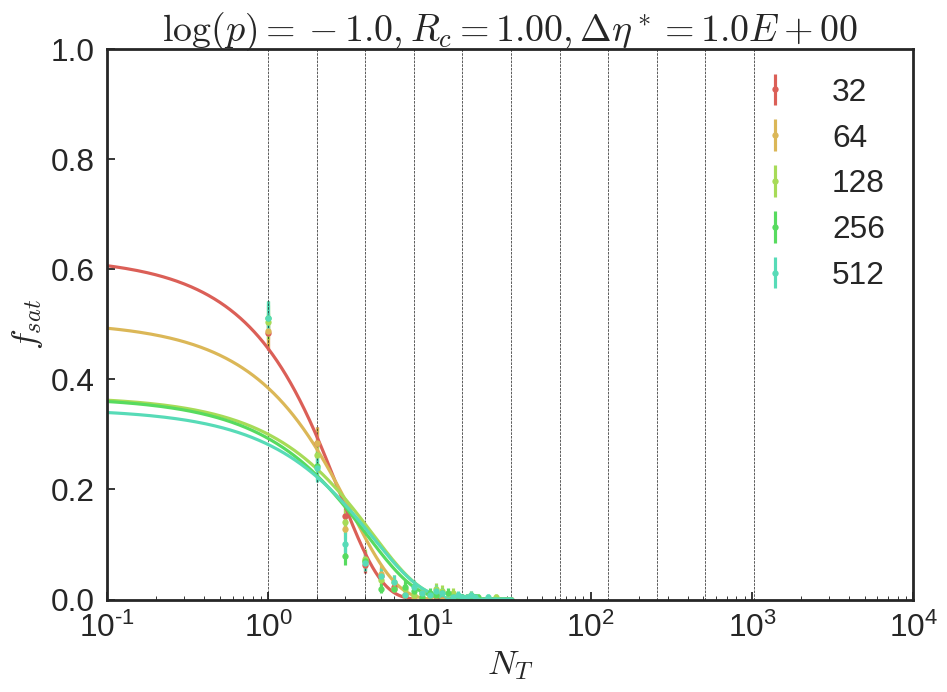

64.0
[ 17.57029338   4.83460357]
[ 0.14832455  0.12757825]
8.0 27.0
128.0
[ 21.40400454   6.42573125]
[ 0.19296246  0.15888538]
9.0 34.0
256.0
[ 22.0069951    6.77341915]
[ 0.18496793  0.15255098]
8.0 36.0
512.0
[ 21.51518376   6.78909776]
[ 0.18309395  0.15165059]
8.0 35.0


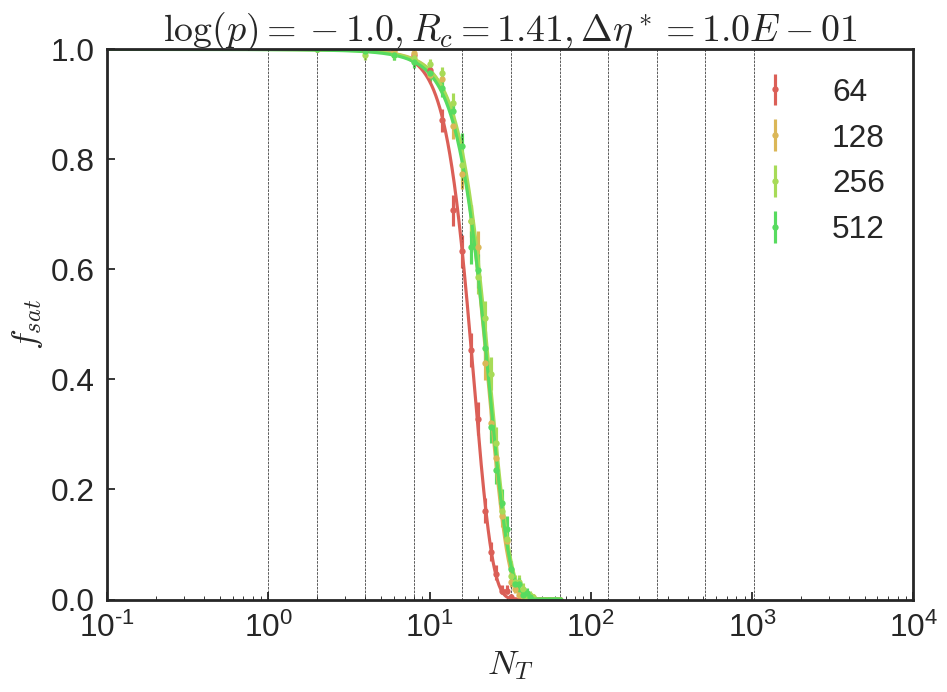

64.0
[-1.47998795  4.15232678]
[ 0.71449237  0.5353213 ]
-10.0 7.0
128.0
[-5.34611439  7.43358657]
[ 2.04444373  1.45313516]
-20.0 10.0
256.0
[-8.53004323  9.64991408]
[ 2.07297054  1.27594052]
-28.0 11.0
512.0
[-8.32546732  9.84013254]
[ 1.82349158  1.23210615]
-28.0 11.0


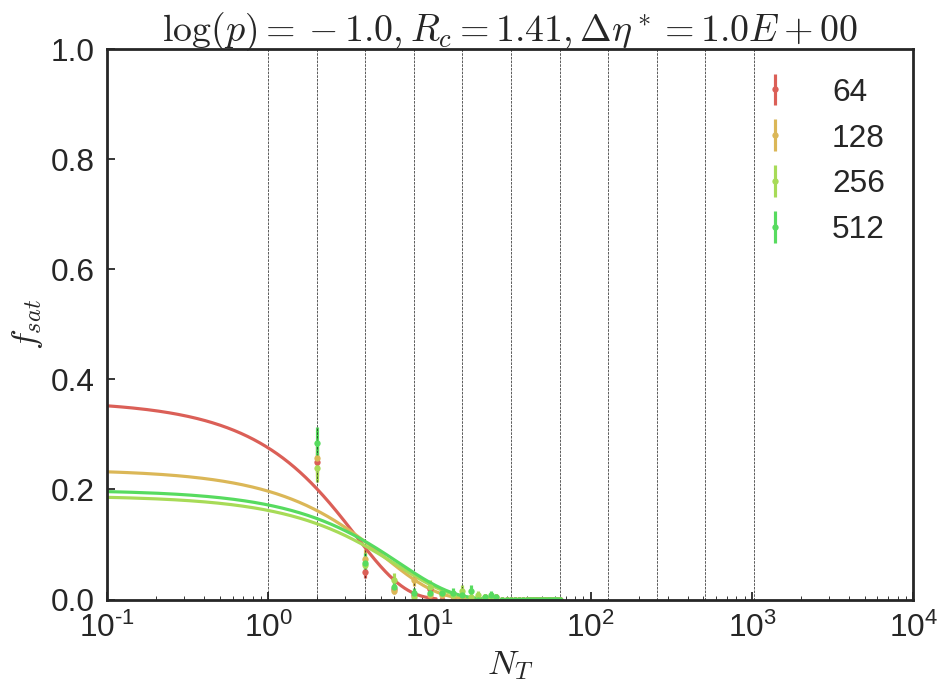

128.0
[ 27.29977514   7.31918289]
[ 0.26595592  0.22981541]
13.0 42.0
256.0
[ 30.38153777   8.99447669]
[ 0.27646527  0.24478368]
12.0 48.0
512.0
[ 30.76863654   9.02101686]
[ 0.23880223  0.22917179]
13.0 49.0


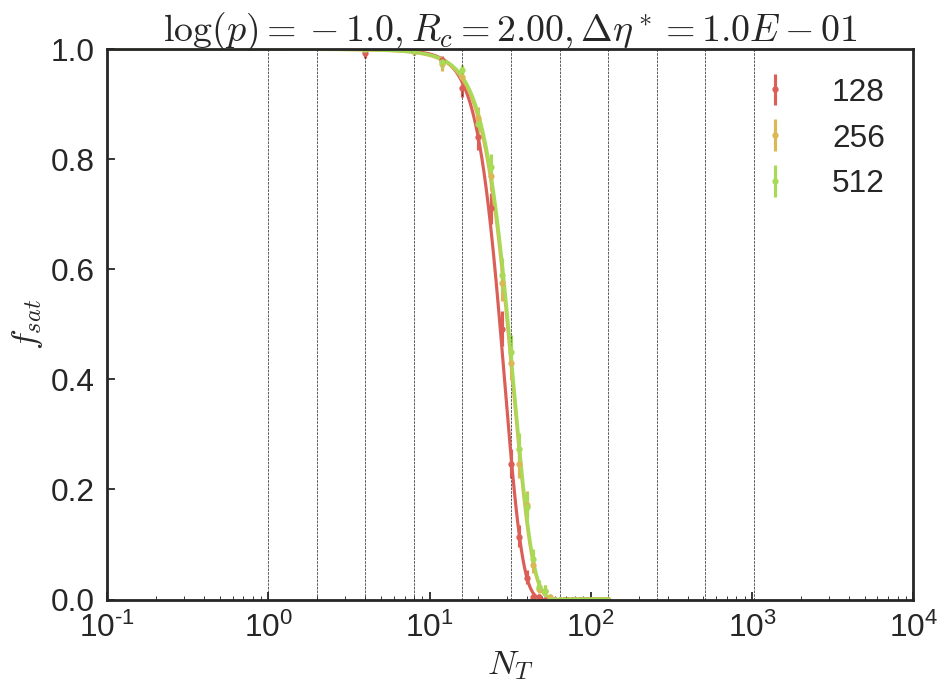

128.0
[-24.0618479   17.63881214]
[ 5.18084761  2.46134156]
-59.0 11.0
256.0
[-25.79499277  18.13912099]
[ 7.12333524  3.52211099]
-62.0 10.0
512.0
[-34.54899142  23.53684016]
[ 7.04036373  3.16809899]
-82.0 13.0


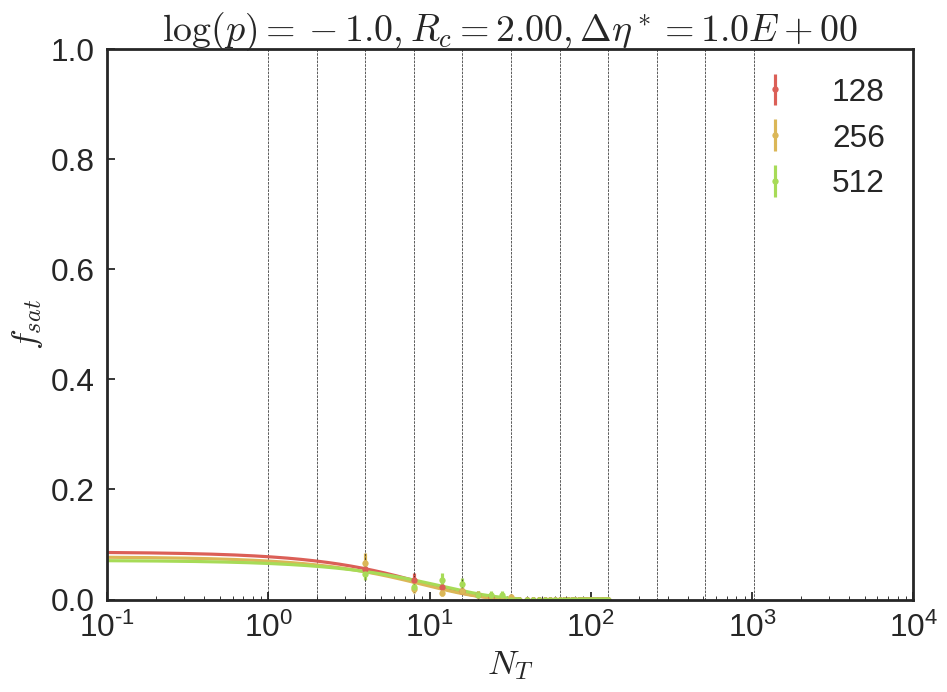

{(-1.0, 2.0, 0.10000000000000001): [27.299775137157283, 30.381537773398655, 30.768636541912272], (-1.0, 0.5, 0.10000000000000001): [5.853030861513159, 7.0333746580675287, 8.3696525002003312, 8.8597692072517926, 8.9328413520458234, 8.9749315441189328, 8.8823462380145131, 8.8638437051107157], (-1.0, 2.0, 1.0): [-24.061847901483009, -25.794992767814787, -34.54899142294191], (-1.0, 1.0, 1.0): [0.73512791003899025, 0.040583337230090742, -1.7521756382286131, -1.6291146102432776, -2.1493872782833163], (-1.0, 0.70999999999999996, 0.10000000000000001): [7.9221144952490707, 10.295977725617361, 11.7046679895004, 12.147396627788959, 12.122590405016396, 12.08555650463639, 12.489724141239353], (-1.0, 1.0, 0.10000000000000001): [11.575616185814786, 14.721079143842237, 15.856364454058541, 15.878405692798928, 15.773898320022077, 15.523397414589258], (-1.0, 0.5, 1.0): [0.82013736542048921, 0.77181602185793952, 0.82067420256065593, 0.10273033816440864, 0.54127140518803529, 0.17129661589317099, 0.02481460

In [5]:
def binomMLE(x, y, dist_param, func, jac=None, p0=None):
    
    n = dist_param.astype(np.int)
    k = (n*y).astype(np.int)
        
    fit_func = lambda theta: -np.sum(k * np.log(func(x, *theta) + np.sqrt(np.finfo(float).eps)) 
                                          + (n - k) * np.log(1.0 - func(x, *theta) + np.sqrt(np.finfo(float).eps)))
    
#     fit_jac = lambda theta: np.array([-np.sum((k * 1.0/(func(x, *theta) + 1e-12) 
#                                           - (n - k) * 1.0/(1.0 - func(x, *theta) + 1e-12))* jac(x, *theta)[0]),
#                                      -np.sum((k * 1.0/(func(x, *theta) + 1e-12) 
#                                           - (n - k) * 1.0/(1.0 - func(x, *theta) + 1e-12))* jac(x, *theta)[1])])
    
    res = spo.minimize(fit_func, p0, jac=None,
                       method='BFGS', options={'gtol': np.sqrt(np.finfo(float).eps), 'disp': False})
    
#     print res
    
    return res.x

def mcError(x, y, dist_param, fit_func, p0, dist="gaussian", bounds=(-np.inf, np.inf), nresample=100, plot=False):
    
    p = np.zeros([len(p0), nresample], float)
    
    x = np.array(x, float)
    y = np.array(y, float)
    dist_param = np.array(dist_param, float)
        
    for n in range(nresample):
#         if n % 100 == 0:
#             print n

        y_tmp = np.array(rand.binomial(dist_param.astype(int), y) / dist_param)

        avg =  binomMLE(x, y_tmp, dist_param, fit_func, jac=None, p0=p0)
        
        p[:, n] = avg
    
    if plot:
    
        fig, axes = plt.subplots(1, len(p0), figsize=(24, 8))
        for i in range(len(p0)):
            sns.distplot(p[i], ax=axes[i], rug=True, rug_kws={"color": "g"},
                         kde_kws={"color": "k", "lw": 3},
                         hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "g"})
    
    return np.mean(p, axis=1), np.std(p, axis=1), sp.stats.skew(p, axis=1)



func = lambda x, mu, sigma : 0.5*sp.special.erfc((x-mu) / sigma / np.sqrt(2))
jac = lambda x, mu, sigma : np.array([1.0/np.sqrt(np.pi * sigma**2) * np.exp((x-mu)**2 / sigma**2),
                            (x-mu)/np.sqrt(np.pi * sigma**2) * np.exp((x-mu)**2 / sigma**2)])

                                     
NN_list = {}
NE_list = {}
NTc_list = {}
NTc_err_list = {}
w_list = {}
w_err_list = {}

for (Lp ,Rc, eta), group0 in df_agg.groupby(['Lp', 'Rc', 'eta']):

    palette = it.cycle(sns.color_palette())

    fig, ax1 = plt.subplots()

    NN_list[(Lp, Rc, eta)] = []
    NE_list[(Lp, Rc, eta)] = []
    NTc_list[(Lp, Rc, eta)] = []
    NTc_err_list[(Lp, Rc, eta)] = []
    w_list[(Lp, Rc, eta)] = []
    w_err_list[(Lp, Rc, eta)] = []

    for NN, group1 in group0.groupby('NN'):

        color = next(palette)

        NT = np.array(group1['NTS'])
        count = np.array(group1['count'])

        fsat = np.array(group1['fsat'])

        fsat_low = np.array(group1['fsat_err_low'])
        fsat_up = np.array(group1['fsat_err_up'])

        NE = np.mean(group1['NE'])


        ax1.errorbar(NT, fsat, 
                    yerr=[fsat_low, fsat_up], fmt=".", label="{:}".format(int(NN)), 
                     color=color)




        avg, std, skew = mcError(NT, fsat, count, func, [10.0, 20.0], 
                       dist="binomial", bounds=([-50, 0.0], [300, 100]), plot=False, nresample=100)

#         avg =  binomMLE(NT, fsat, count, func, jac=None, p0=[0, 10])

        print NN
        print avg
        print std
#         print skew

        sigma = 2
        print np.round(avg[0]-sigma*avg[1]), np.round(avg[0]+sigma*avg[1])


        ax1.plot(np.linspace(0.1,avg[0]+3*avg[1], 1000), func(np.linspace(0.1, avg[0]+3*avg[1], 1000), *avg), color=color)

        NN_list[(Lp, Rc, eta)].append(NN)
        NE_list[(Lp, Rc, eta)].append(NE)
        NTc_list[(Lp, Rc, eta)].append(avg[0])
        NTc_err_list[(Lp, Rc, eta)].append(std[0])
        w_list[(Lp, Rc, eta)].append(avg[1])
        w_err_list[(Lp, Rc, eta)].append(std[1])



    for i in range(0, 11):
        ax1.vlines(2**i, 0, 1.0, color='k', linestyle='dashed', linewidth=0.5)


    ax1.legend(loc="upper right")
    ax1.set_xlabel(r'$N_T$')
    ax1.set_ylabel(r'$f_{sat}$')
    ax1.set_xlim(1e-1, 1e4)
    ax1.set_xscale('log')
    ax1.set_ylim(0,1)
    ax1.set_title(r'$\log(p)={0:.1f}, R_c={1:.2f}, \Delta\eta^*={2:.1E}$'.format(Lp, Rc, eta))

    # plt.savefig("prob_success_err.png")
    # plt.savefig("fsat_slice_2D.eps")

    plt.show()
    
print NTc_list

In [22]:
func = lambda x, mu, sigma : 0.5*sp.special.erfc((x-mu) / sigma / np.sqrt(2))

for eta, group0 in df_agg.groupby('eta'):

    palette = it.cycle(sns.color_palette())

    fig, ax1 = plt.subplots()
    
    for NN, group1 in group0.groupby('NN'):

    #     if NN > 128:
    #         continue

    #     index = NN_list.index(NN)

        color = next(palette)

        NT = np.array(group1['NTS'])

        fsat = np.array(group1['fsat'])

        NE = np.mean(group1['NE'])


    #     ax1.plot(np.linspace(0, 200, 1000) / NB, func(np.linspace(0, 200, 1000), rhoc_list[index], width_list[index]), color=color)

        ax1.errorbar(NT / NE, fsat, 
                    yerr=[group1['fsat_err_low'], group1['fsat_err_up']], fmt=".", label="{:}".format(int(NN)), 
                     color=color)

        index = np.where(NN_list[eta]==NN)[0][0]
        x = np.linspace(0,NTc_list[eta][index]+3*w_list[eta][index], 1000)
        ax1.plot(x / NE, 
                 func(x, NTc_list[eta][index], w_list[eta][index]), color=color)



    ax1.legend(loc="upper right")
    ax1.set_xlabel(r'$N_T / N_e$')
    ax1.set_ylabel(r'$f_{sat}$')
    ax1.set_xlim(0.0, 0.4)
    ax1.set_ylim(0,1)
#     ax1.set_xscale('log')
    ax1.set_title(r'$\Delta\eta^*={:.1E}$'.format(eta))

    # plt.savefig("prob_success_err.png")
    # plt.savefig("fsat_slice_2D.eps")

    plt.show()

KeyError: 0.10000000000000001

0.1
[ 7.60132872]
[[ 0.00134255]]
1.0
[ 0.68547919]
[[ 0.00527675]]
0.1
[ 10.52890955]
[[ 0.00160869]]
1.0
[ 0.57962527]
[[ 0.00921609]]
0.1
[ 14.61397314]
[[ 0.00214122]]
1.0
[ 0.3677623]
[[ 0.01564025]]
0.1
[ 20.23693544]
[[ 0.00761212]]
1.0
[-3.17289818]
[[ 0.36609046]]
0.1
[ 29.55973717]
[[ 0.02234297]]
1.0
[-27.24744405]
[[ 12.96368061]]


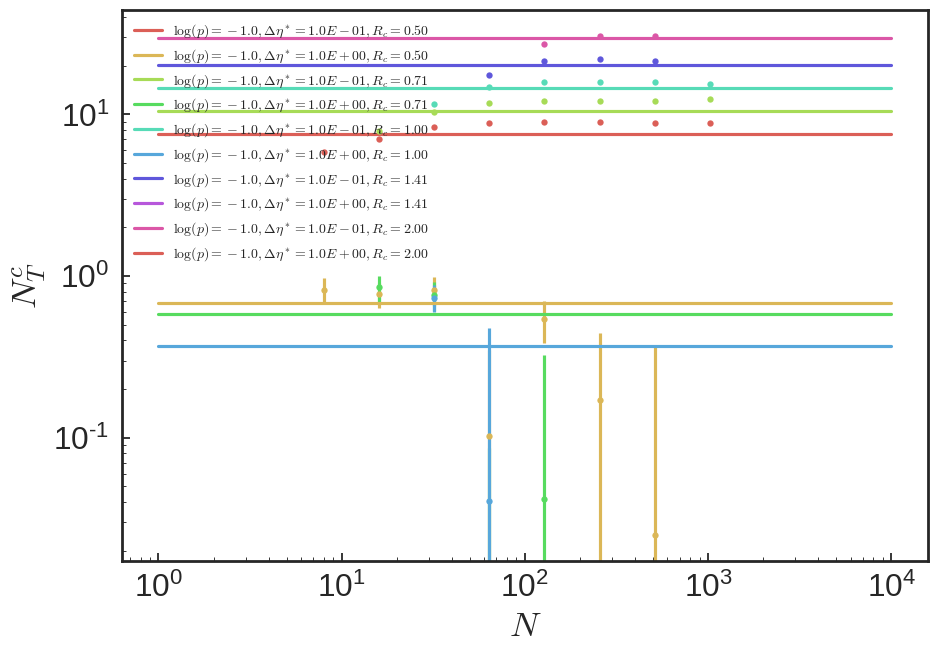

(-1.0, 0.5, 0.10000000000000001)
[ 3.03691325]
[[ 0.00135396]]
(-1.0, 0.5, 1.0)
[ 2.25813929]
[[ 0.00658312]]
(-1.0, 0.70999999999999996, 0.10000000000000001)
[ 4.02762568]
[[ 0.00165582]]
(-1.0, 0.70999999999999996, 1.0)
[ 2.48421701]
[[ 0.00907984]]
(-1.0, 1.0, 0.10000000000000001)
[ 4.85269173]
[[ 0.00183934]]
(-1.0, 1.0, 1.0)
[ 2.81731827]
[[ 0.01495336]]
(-1.0, 1.4099999999999999, 0.10000000000000001)
[ 6.06831284]
[[ 0.0053332]]
(-1.0, 1.4099999999999999, 1.0)
[ 5.80956377]
[[ 0.19098175]]
(-1.0, 2.0, 0.10000000000000001)
[ 8.42344565]
[[ 0.0182937]]
(-1.0, 2.0, 1.0)
[ 19.45737816]
[[ 2.89595492]]


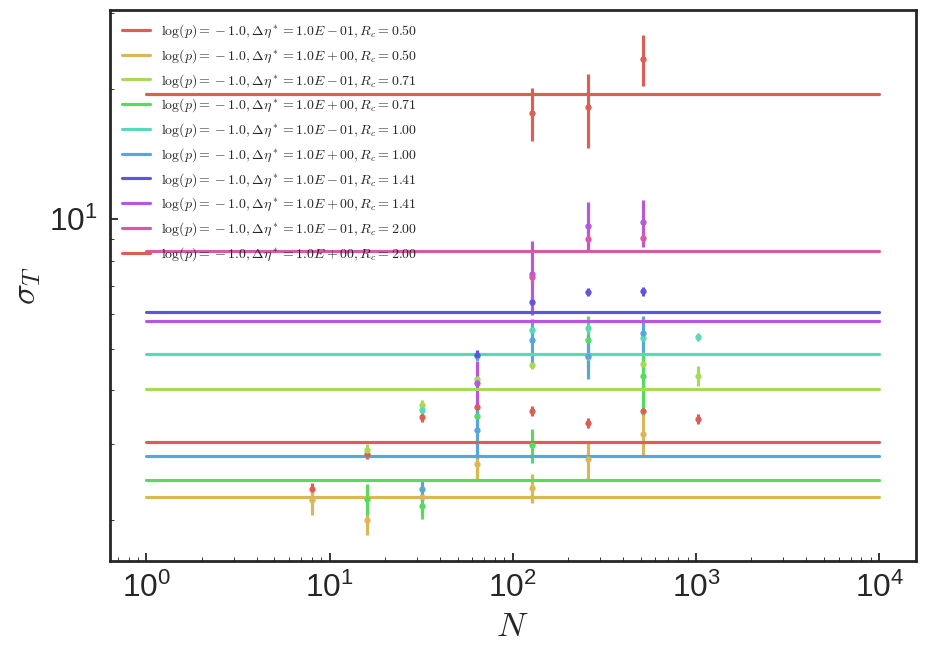

In [6]:
def func1(x, B, C):
    return B * x**C

def func2(x, A, B, C):
    return A + B * x**C

def func3(x, A):
    return A*np.ones(len(x), float)

fig, ax1 = plt.subplots(1,1)

# avg, std, skew = mcError(NN_list[0:], NTc_list[0:], np.array(NTc_err_list[0:]), func2, [0.0, 1.0, 0.5], 
#                    bounds=([-100, -np.inf, 0.0],[100, np.inf, 1.0]),
#                    nresample=10000, plot=True)


palette = it.cycle(sns.color_palette("hls", 9))

for (Lp, Rc, eta) in sorted(NN_list):
    
    color = next(palette)
    
    print eta

#     avg, std = spo.curve_fit(func2, NN_list[eta][0:], NTc_list[eta][0:], p0=[0.0, 1.0, 0.5], 
#                              sigma=np.array(NTc_err_list[eta][0:]), 
#                              absolute_sigma=True, maxfev=10000)

    
#     print NTc_list[eta][0:]
#     print NTc_err_list[eta][0:]

    start = 0
    stop = 5
    
    avg, std = spo.curve_fit(func3, NN_list[(Lp, Rc, eta)][start:stop], NTc_list[(Lp, Rc, eta)][start:stop], 
                             p0=[0.0], 
                             sigma=np.array(NTc_err_list[(Lp, Rc, eta)][start:stop]), 
                             absolute_sigma=True, maxfev=10000)

    print avg
    print std
    
#     print NTc_list[eta][start:stop]
#     print func1(NN_list[eta][start:stop], *avg)

    # avg, pcov = curve_fit(func2, NN_list, rhoc_list, p0=[0, 0.5, 0.17],sigma=rhoc_err_list, absolute_sigma=True, 
    #                        bounds=([-10, -10, -10],[1, 100, 10]))

    # print avg

    ax1.plot(10**np.linspace(0, 4, 100), func3(10**np.linspace(0,4, 100), *avg), '-', color=color,
            label=r'$\log(p)={0:.1f}, \Delta\eta^*={1:.1E}, R_c={2:.2f}$'.format(Lp, eta, Rc))


    # ax1.plot(10**np.linspace(0, 4, 100), func2(10**np.linspace(0, 4, 100), *avg)- avg[0], 'b-',
    #         label=r"$\rho_T^c = {0:.2f} + {1:.2f}N^{{-{2:.2f}}}$".format(avg[0], avg[1], avg[2]))

    ax1.errorbar(NN_list[(Lp, Rc, eta)], np.array(NTc_list[(Lp, Rc, eta)]), 
                 yerr=np.array(NTc_err_list[(Lp, Rc, eta)]), fmt=".", color=color)

# handles, labels = ax1.get_legend_handles_labels()

# line = mlines.Line2D([], [], lw=0.0)
# handles.append(line)
# labels.append(r"$N_T^\infty = {0:.1f}$".format(avg[0]))
# # labels.append(r"$N_T^\infty = {0:.1f} \pm {1:.1f}$".format(avg[0], std[0]))

# line = mlines.Line2D([], [], lw=0.0)
# handles.append(line)
# labels.append(r"$\alpha = {0:.2f}$".format(avg[2]))
# # labels.append(r"$\alpha = {0:.3f} \pm {1:.3f}$".format(avg[2], std[2]))

# ax1.legend(handles, labels, loc="lower right")

# ax1.set_xlim(1e0, 1e4)
# ax1.set_ylim(1e-1, 1e3)

ax1.set_xlabel("$N$")
ax1.set_ylabel(r"$N_T^c$")
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(loc="upper left", prop={'size':10})

# plt.savefig("crit_target_edges_2D.eps")

plt.show()

fig, ax2 = plt.subplots(1,1)

palette = it.cycle(sns.color_palette("hls", 9))

for (Lp, Rc, eta) in sorted(NN_list):
    
    color = next(palette)
    
    print (Lp, Rc, eta)
    
    # avg, std, skew = mcError(NN_list[0:], width_list[0:], np.array(width_err_list[0:]), func1, [0.5, 0.5], 
    #                    bounds=([-10, -10],[10, 10]),
    #                    nresample=1000, plot=False)0
    avg, std = spo.curve_fit(func3, NN_list[(Lp, Rc, eta)][start:stop], w_list[(Lp, Rc, eta)][start:stop], p0=[0.0], 
                             sigma=np.array(w_err_list[(Lp, Rc, eta)][start:stop]), 
                             absolute_sigma=True, maxfev=10000)

    print avg
    print std

    ax2.plot(10**np.linspace(0, 4, 100), func3(10**np.linspace(0, 4, 100), *avg), '-', color=color, 
            label=r'$\log(p)={0:.1f}, \Delta\eta^*={1:.1E}, R_c={2:.2f}$'.format(Lp, eta, Rc))


    ax2.errorbar(NN_list[(Lp, Rc, eta)], w_list[(Lp, Rc, eta)], yerr=np.array(w_err_list[(Lp, Rc, eta)]), fmt=".", color=color)

# handles, labels = ax2.get_legend_handles_labels()

# line = mlines.Line2D([], [], lw=0.0)
# handles.append(line)
# labels.append(r"$\beta = {0:.2f}$".format(avg[1]))
# # labels.append(r"$\beta = {0:.3f} \pm {1:.3f}$".format(avg[1], std[1]))

# ax2.legend(handles, labels, loc="lower right")

ax2.set_xlabel("$N$")
ax2.set_ylabel(r"$\sigma_{T}$")
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend(loc="upper left", prop={'size':10})

# plt.savefig("transition_width_2D.eps")

plt.show()

In [ ]:


func = lambda x, mu, sigma : 0.5*(1-sp.special.erf((x-mu) / sigma / np.sqrt(2)))

for eta, group0 in df_agg.groupby('eta'):

    palette = it.cycle(sns.color_palette())

    fig, ax1 = plt.subplots()
    
    for NN, group1 in group0.groupby('NN'):

    #     if NN > 128:
    #         continue

    #     index = NN_list.index(NN)

        color = next(palette)

        NT = np.array(group1['NTS'])
        
        NE = np.mean(group1['NE'])

        tot = np.array(group1['count'] + group1['err_count'])
        err_count = np.array(group1['err_count'])

        
    #     ax1.plot(np.linspace(0, 200, 1000) / NB, func(np.linspace(0, 200, 1000), rhoc_list[index], width_list[index]), color=color)

        ax1.plot(NT / NE, err_count / tot, ".-", label="{:}".format(int(NN)), 
                     color=color)





    ax1.legend(loc="upper right")
    ax1.set_xlabel(r'$\rho_T$')
    ax1.set_ylabel(r'$f_{err}$')
    ax1.set_xlim(0, 0.5)
    ax1.set_ylim(0.0, 1.0)
#     ax1.set_yscale('log')
    ax1.set_title(r'$\Delta\eta^*={:.1E}$'.format(eta))

    # plt.savefig("prob_success_err.png")
    # plt.savefig("fsat_slice_2D.eps")

    plt.show()

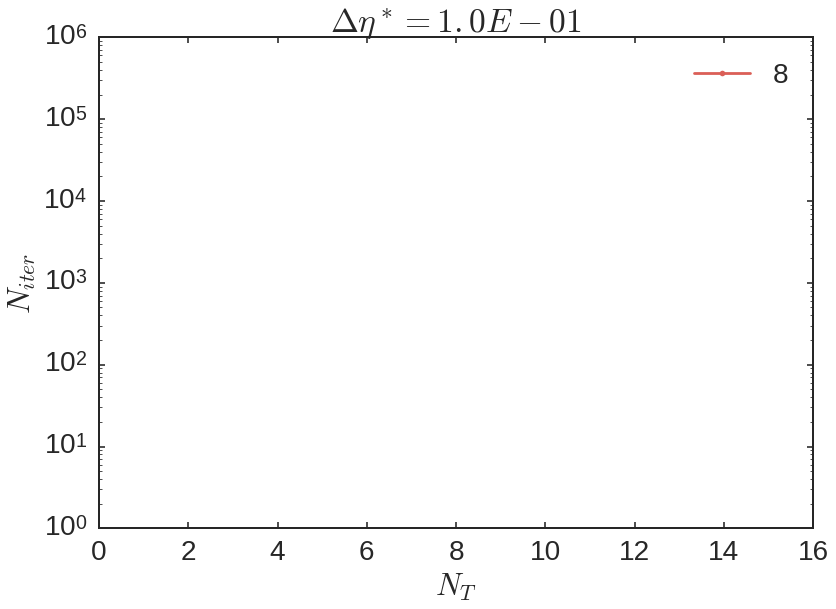

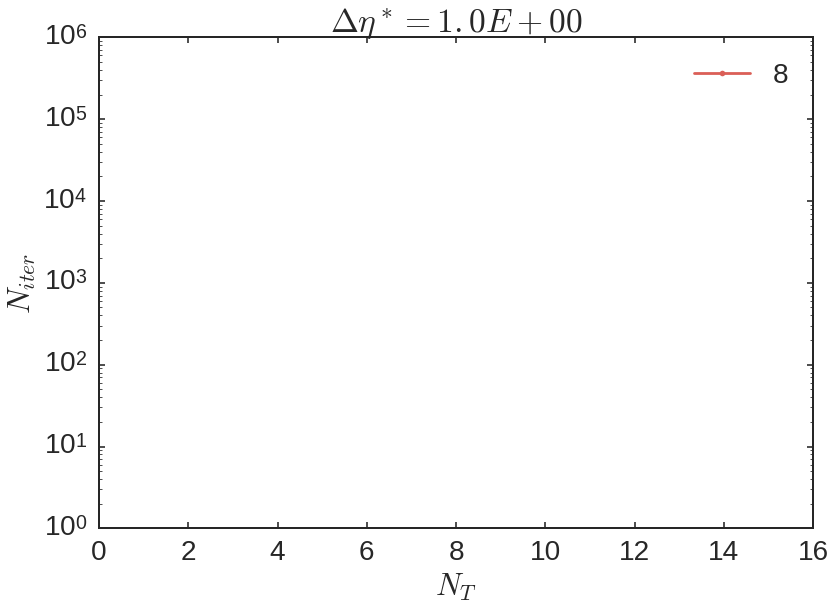

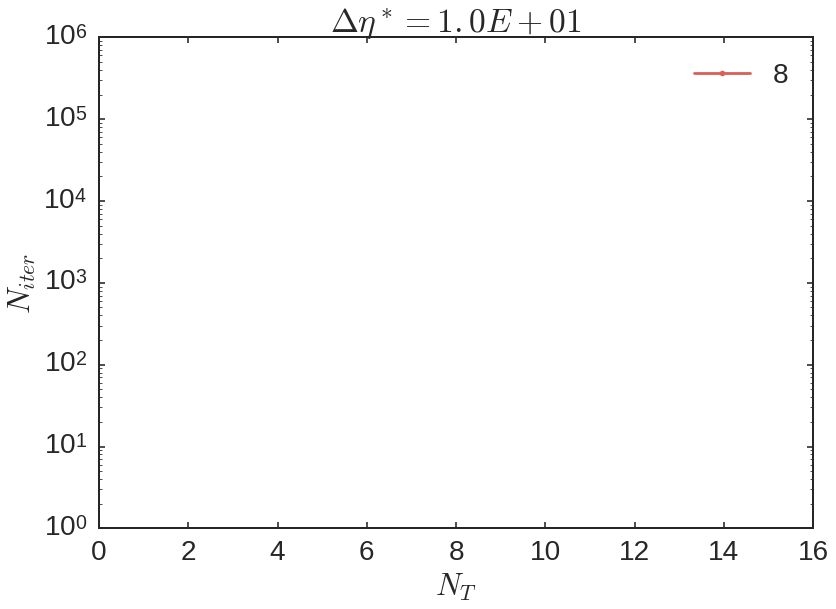

In [30]:


func = lambda x, mu, sigma : 0.5*(1-sp.special.erf((x-mu) / sigma / np.sqrt(2)))

for eta, group0 in df_agg.groupby('eta'):

    palette = it.cycle(sns.color_palette())

    fig, ax1 = plt.subplots()
    
    for NN, group1 in group0.groupby('NN'):

    #     if NN > 128:
    #         continue

    #     index = NN_list.index(NN)

        color = next(palette)

        NT = np.array(group1['NTS'])

        niter = np.array(group1['niter'])


    #     ax1.plot(np.linspace(0, 200, 1000) / NB, func(np.linspace(0, 200, 1000), rhoc_list[index], width_list[index]), color=color)

        ax1.plot(NT, niter, ".-", label="{:}".format(int(NN)), 
                     color=color)





    ax1.legend(loc="upper right")
    ax1.set_xlabel(r'$N_T$')
    ax1.set_ylabel(r'$N_{iter}$')
#     ax1.set_xlim(0, 40)
    ax1.set_ylim(1e0, 1e6)
    ax1.set_yscale('log')
    ax1.set_title(r'$\Delta\eta^*={:.1E}$'.format(eta))

    # plt.savefig("prob_success_err.png")
    # plt.savefig("fsat_slice_2D.eps")

    plt.show()

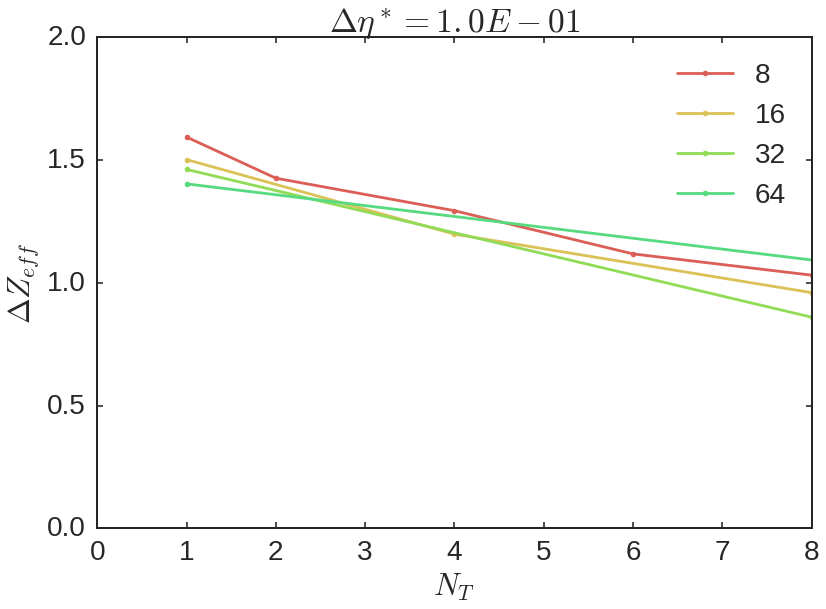

In [27]:


func = lambda x, mu, sigma : 0.5*(1-sp.special.erf((x-mu) / sigma / np.sqrt(2)))

for eta, group0 in df_agg.groupby('eta'):

    palette = it.cycle(sns.color_palette())

    fig, ax1 = plt.subplots()
    
    for NN, group1 in group0.groupby('NN'):

    #     if NN > 128:
    #         continue

    #     index = NN_list.index(NN)

        color = next(palette)

        NT = np.array(group1['NTS'])

        NR = np.array(group1['NR'])
        NE = np.array(group1['NE'])
        
        DZ = 2.0 * (NE - NR) / NN - 2.0 * (2 - 1.0 * 2 / NN)

    #     ax1.plot(np.linspace(0, 200, 1000) / NB, func(np.linspace(0, 200, 1000), rhoc_list[index], width_list[index]), color=color)

        ax1.plot(NT, DZ, ".-", label="{:}".format(int(NN)), 
                     color=color)





    ax1.legend(loc="upper right")
    ax1.set_xlabel(r'$N_T$')
    ax1.set_ylabel(r'$\Delta Z_{eff}$')
    ax1.set_ylim(0, 2)
    ax1.set_xlim(0, 8)
#     ax1.set_ylim(1e0, 1e6)
#     ax1.set_yscale('log')
    ax1.set_title(r'$\Delta\eta^*={:.1E}$'.format(eta))

    # plt.savefig("prob_success_err.png")
    # plt.savefig("fsat_slice_2D.eps")

    plt.show()

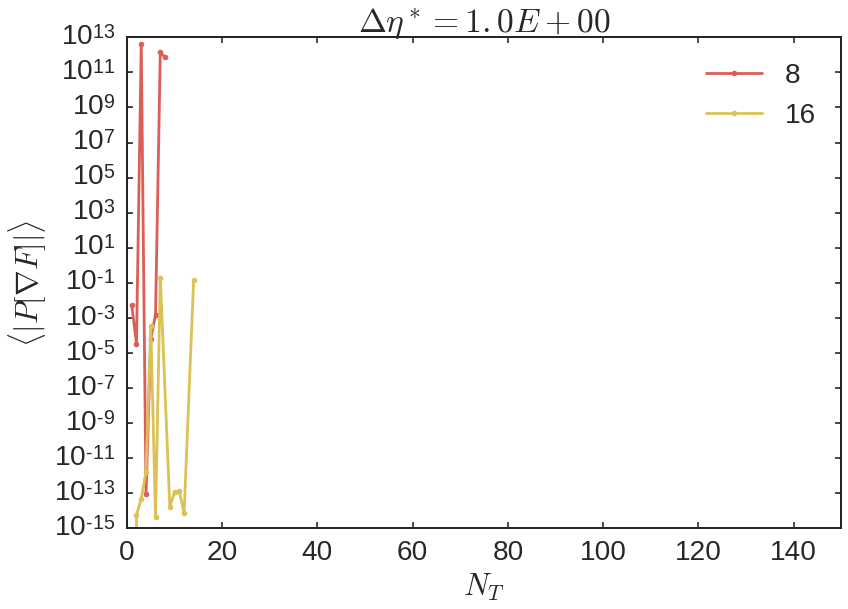

In [163]:
palette = it.cycle(sns.color_palette())

fig, ax1 = plt.subplots()

func = lambda x, mu, sigma : 0.5*(1-sp.special.erf((x-mu) / sigma / np.sqrt(2)))

eta1 = 1e0

for NN, group in df_agg[df_agg.eta == eta1].groupby('NN'):

#     if NN > 128:
#         continue
    
#     index = NN_list.index(NN)
    
    color = next(palette)
    
    NT = np.array(group['NTS'])
        
    pgrad_norm = np.array(group['pgrad_norm'])
    
    NE = np.mean(group['NE'])

        
#     ax1.plot(np.linspace(0, 200, 1000) / NB, func(np.linspace(0, 200, 1000), rhoc_list[index], width_list[index]), color=color)
    
    ax1.plot(NT, pgrad_norm, ".-", label="{:}".format(int(NN)), 
                 color=color)
    


    
            
ax1.legend(loc="upper right")
ax1.set_xlabel(r'$N_T$')
ax1.set_ylabel(r'$\langle|P[\nabla F]|\rangle$')
ax1.set_xlim(0, 150)
# ax1.set_ylim(0,1)
ax1.set_yscale('log')
ax1.set_title(r'$\Delta\eta^*={:.1E}$'.format(eta1))

# plt.savefig("prob_success_err.png")
# plt.savefig("fsat_slice_2D.eps")

plt.show()

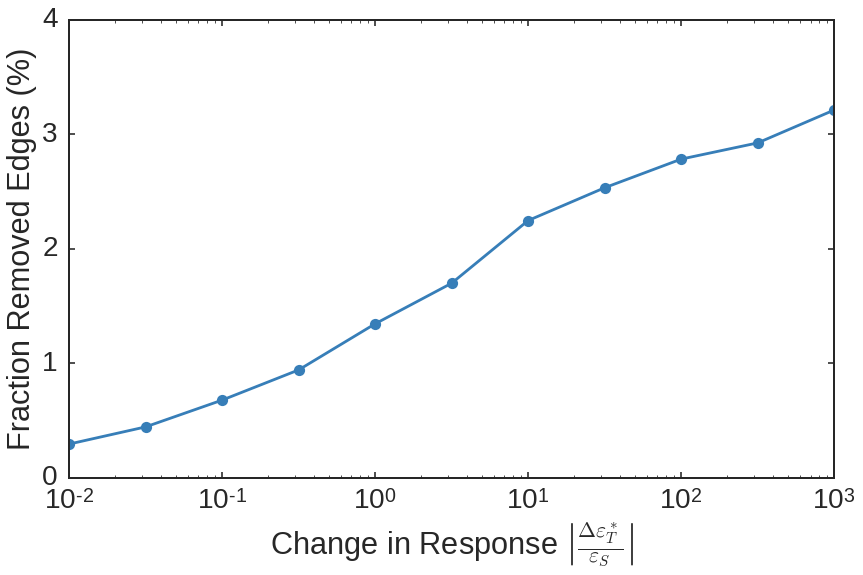

In [10]:

fig, ax1 = plt.subplots()

    
eta = np.array(df_agg[df_agg.NR > 0]['eta'])  
NR = np.array(df_agg[df_agg.NR > 0]['rhoR'])*100
NR_err = np.array(df_agg[df_agg.NR > 0]['rhoR_err'])*100
    
    
    
ax1.errorbar(eta, NR, yerr=NR_err, fmt="o-", color="#377eb8")
    
          
# ax1.legend(loc="upper right")
ax1.set_xlabel(r'Change in Response $\left|\frac{\Delta\varepsilon^*_T}{\varepsilon_S}\right|$')
ax1.set_ylabel(r'Fraction Removed Edges (%)')
ax1.set_xscale('log')
# ax1.set_yscale('log')
ax1.set_xlim(1e-2, 1e3)
ax1.set_ylim(0,4)
ax1.set_yticks(np.linspace(0, 4, 5))

plt.tight_layout()

plt.savefig("disc_rem_bonds.svg")

plt.show()

In [7]:
x = np.array([1.1,2.1,3.1, 4.1, 5.1])
y = np.array([-1, -2, 3, -1, 4])
over =  np.where(x >= 3)[0]
print over
print y[over]
print y[over] < 0
print over[y[over] < 0]
print over[list([False, True, False]]

[2 3 4]
[ 3 -1  4]
[False  True False]
[3]
[2 3 2]


/data1/home/rocks/anaconda/envs/default/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


In [17]:
print x[[True, False, True, False, False]]

[ 2.1  1.1  2.1  1.1  1.1]


/data1/home/rocks/anaconda/envs/default/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  if __name__ == '__main__':


In [18]:
np.__version__

'1.11.2'